<a href="https://colab.research.google.com/github/dorirozen/AI_Tasks/blob/main/DoriFinalProjectNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project NLP Course - Dori Rozen

In [8]:
#@title pips
!pip install -q langchain langchain-community groq langchain-groq optuna pyarrow beautifulsoup4 transformers sumy tensorflow keras torch requests elsapy

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [1]:
#@title imports
import os
import re
import time
import csv
import requests
import numpy as np
import pandas as pd
import spacy
import tensorflow as tf
from bs4 import BeautifulSoup
from gensim.models import Word2Vec
from nltk import download
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from pandas import unique
from transformers import GPT2Tokenizer, GPT2Model
from google.colab import userdata
# Download necessary NLTK data
download('punkt')
download('wordnet')
download('stopwords')
download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
#@title Utils for project

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

class FancyPrinter:
    def __init__(self):
        self.emojis = {
            'robot': '🤖', 'folder': '📂', 'pin': '📌', 'magnifier': '🔍',
            'sparkles': '✨', 'book': '📚', 'light_bulb': '💡', 'check': '✅',
            'warning': '⚠️', 'error': '❌', 'info': 'ℹ️', 'star': '⭐',
            'fire': '🔥', 'clock': '⏰', 'rocket': '🚀', 'gear': '⚙️','scroll': '📜','bar_chart': '📊',
            'heart': '❤️', 'thumbs_up': '👍', 'thumbs_down': '👎','gear': '⚙️','rocket': '🚀','floppy_disk': '💾',
        }
        self.separator_char = '='
        self.separator_length = 80

    def print_formatted(self, text, emoji='info', separator=None, prefix='', suffix=''):
        emoji_icon = self.emojis.get(emoji, emoji)
        formatted_text = f"{emoji_icon} {text}"

        if prefix:
            formatted_text = f"{prefix}{formatted_text}"
        if suffix:
            formatted_text = f"{formatted_text}{suffix}"

        print(formatted_text)

        if separator:
            self.print_separator(separator)

    def print_separator(self, style='single'):
        char = self.separator_char if style == 'single' else self.separator_char * 2
        print(char * self.separator_length)

    def set_separator(self, char='=', length=80):
        self.separator_char = char
        self.separator_length = length

    def add_emoji(self, name, icon):
        self.emojis[name] = icon

    def remove_emoji(self, name):
        self.emojis.pop(name, None)

    def header(self, text, emoji='robot'):
        self.print_formatted(text, emoji, 'double', '\n')

    def subheader(self, text, emoji='pin'):
        self.print_formatted(text, emoji, 'single', '\n')

    def info(self, text, emoji='light_bulb'):
        self.print_formatted(text, emoji)

    def success(self, text):
        self.print_formatted(text, 'check')

    def warning(self, text):
        self.print_formatted(text, 'warning')

    def error(self, text):
        self.print_formatted(text, 'error')

# Usage example
fp = FancyPrinter()

fp.header("Text Generation from Partial Sentences")
fp.subheader("Subtitle Example")
fp.info("Loading data from file...")
fp.success("Data loaded from output_extracted_sentences.txt")
fp.warning("This is a warning message")
fp.error("This is an error message")

# Custom usage
fp.print_formatted("Custom message with star", 'star', 'single')
fp.set_separator('-', 50)
fp.print_formatted("Message with custom separator", 'rocket', 'double')

# Add a new emoji
fp.add_emoji('python', '🐍')
fp.print_formatted("Python is awesome!", 'python')


🤖 Text Generation from Partial Sentences

📌 Subtitle Example
💡 Loading data from file...
✅ Data loaded from output_extracted_sentences.txt
⚠️ This is a warning message
❌ This is an error message
⭐ Custom message with star
🚀 Message with custom separator
----------------------------------------------------------------------------------------------------
🐍 Python is awesome!


# Data Collection - from SCOPUS API

## Issues with the API

Before examining the code, it's important to note two significant problems with this API:

1. Inability to load only essential information (abstract):
   - The API requires loading the entire document text, rather than allowing selective retrieval of the abstract.

2. Limited access to articles:
   - Many articles are inaccessible due to a predefined limit in the API.

## Solution Approach

In this section, I will demonstrate:

1. The general approach to loading information from the API.
2. Strategies employed to address the accompanying restrictions.

**It's worth noting that the data cleaning process was extensive and could be considered a project in itself. The complexity and time-consuming nature of this task underscores the challenges faced when working with this particular API.**

In [4]:
#@title ArticleDataRetriever
import requests
import json
import time
from datetime import datetime
import pandas as pd
from collections import Counter
from elsapy.elsclient import ElsClient
from elsapy.elsdoc import FullDoc
# from elsapy.elsdoc import FullAbs.. not available !
class ArticleDataRetriever:
    def __init__(self, query, api_key,current_year):
        self.query = query
        self.key = api_key
        self.base_url = 'https://api.elsevier.com/content/search/scopus'
        self.output_file = f'scopus_nlp_articles{current_year}.json'
        self.batch_size = 25
        self.max_results = 100
        self.current_year = current_year
        self.all_articles = []
        self.client = ElsClient(api_key)

    def retrieve_articles(self):
        self.all_articles = []
        start = 0
        while start < self.max_results:
            data = self.get_article_details(count=self.batch_size, start=start)
            if not data:
                break
            articles = self.parse_article_details(data)
            if not articles:
                break
            self.all_articles.extend(articles)
            start += self.batch_size
            print(f"Downloaded {start} records so far...")
            time.sleep(1)  # Add a delay to avoid overwhelming the API
        print(f"Total articles downloaded: {len(self.all_articles)}")
        return self.all_articles

    def get_article_details(self, count=25, start=0):
        headers = {
            'X-ELS-APIKey': self.key,
            'Accept': 'application/json'
        }
        params = {
            'query': self.query,
            'count': count,
            'start': start,
            'date': self.current_year
        }
        response = requests.get(self.base_url, headers=headers, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: {response.status_code}")
            return None

    def parse_article_details(self, data):
        articles = []
        if 'search-results' in data and 'entry' in data['search-results']:
            for entry in data['search-results']['entry']:
                article = {
                    'title': entry.get('dc:title', 'N/A'),
                    'authors': entry.get('dc:creator', 'N/A'),
                    'journal': entry.get('prism:publicationName', 'N/A'),
                    'year': entry.get('prism:coverDate', 'N/A')[:4] if 'prism:coverDate' in entry else 'N/A',
                    'doi': entry.get('prism:doi', 'N/A')
                }
                articles.append(article)
        return articles

    def save_data_to_file(self, data, filename):
        with open(filename, 'a') as f:
            json.dump(data, f)
            f.write('\n')

    def print_article_dois(self, num_prints=None):
        print("\n== Article DOIs ==")
        for i, article in enumerate(self.all_articles[:num_prints], 1):
            print(f"{i}. Title: {article['title']}")
            print(f"   DOI: {article['doi']}")
            print()

    def print_article_titles(self, num_prints=None):
        print("\n== Article Titles ==")
        for i, article in enumerate(self.all_articles[:num_prints], 1):
            print(f"{i}. {article['title']}")

    def print_top_journals(self, top_n=10):
        journals = [article['journal'] for article in self.all_articles]
        journal_counts = Counter(journals)
        print(f"\n== Top {top_n} Journals ==")
        for journal, count in journal_counts.most_common(top_n):
            print(f"{journal}: {count} articles")

    def print_articles_per_year(self, num_prints=None):
        years = [article['year'] for article in self.all_articles if article['year'] != 'N/A']
        year_counts = Counter(years)
        print("\n== Articles per Year ==")
        for year in sorted(year_counts.keys())[:num_prints]:
            print(f"{year}: {year_counts[year]} articles")

    def print_top_authors(self, top_n=10):
        all_authors = [author.strip() for article in self.all_articles for author in article['authors'].split(',') if author != 'N/A']
        author_counts = Counter(all_authors)
        print(f"\n== Top {top_n} Authors ==")
        for author, count in author_counts.most_common(top_n):
            print(f"{author}: {count} articles")

    def print_summary(self, num_journals=5, num_years=None, num_authors=5):
        print("\n== Summary ==")
        print(f"Total articles: {len(self.all_articles)}")
        print(f"Query: {self.query}")
        self.print_top_journals(num_journals)

        self.print_articles_per_year(num_years)
        self.print_top_authors(num_authors)

    def export_to_csv(self):
        filename= f'DataCollector/csv_s/articles{self.current_year}.csv'
        df = pd.DataFrame(self.all_articles)
        df.to_csv(filename, index=False)
        print(f"\nData exported to {filename}")
        return df

    def get_detailed_article_info(self, doi):
        doc = FullDoc(doi=doi)
        if doc.read(self.client):
            full_text = self.get_full_text(doi)
            return {
                "title": doc.title,
                "full_text": full_text
            }
        else:
            return None

    def get_full_text(self, doi):
        headers = {
            'X-ELS-APIKey': self.key,
            'Accept': 'application/json'
        }
        url = f"https://api.elsevier.com/content/article/doi/{doi}"
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            data = response.json()
            if 'full-text-retrieval-response' in data:
                full_text_data = data['full-text-retrieval-response'].get('originalText', 'Full text not available')
                if isinstance(full_text_data, dict):
                    return 'Full text not available'
                elif not full_text_data:
                    return 'Full text not available'
                else:
                    return full_text_data
            else:
                return 'Full text not available'
        else:
            return 'Full text not available'

    def extract_text_from_dict(self, data):
        if 'xocs:doc' in data:
            # Assuming the text content is under 'xocs:meta' key inside 'xocs:doc'
            if 'xocs:meta' in data['xocs:doc']:
                return data['xocs:doc']['xocs:meta']
            return data['xocs:doc']
        else:
            return 'Full text not available'

    def retrieve_detailed_info(self, num_articles=5):
        detailed_articles = []
        for i, article in enumerate(self.all_articles):
            doi = article['doi']
            if doi != 'N/A':
                try:
                    detailed_info = self.get_detailed_article_info(doi)
                    if detailed_info and detailed_info['full_text'] != 'Full text not available':
                        self.all_articles[i].update(detailed_info)
                        detailed_articles.append(self.all_articles[i])
                        self.save_data_to_file(self.all_articles[i], self.output_file)  # Save detailed articles to file
                        print(f"Retrieved detailed info for DOI: {doi}")
                    else:
                        print(f"Failed to retrieve detailed info for DOI: {doi} or full text is not available")
                except Exception as e:
                    print(f"Exception occurred for DOI {doi}: {e}")
            else:
                print(f"No DOI available for article: {article['title']}")
        return detailed_articles

    def get_full_text_available_indices(self):
        indices = []
        for i, article in enumerate(self.all_articles):
            if article.get('full_text') and article['full_text'] != 'Full text not available':
                indices.append(i)
            else:
                print(f"Article {i} (DOI: {article['doi']}) does not have full text. Full text value: {article.get('full_text', 'Not present')}")
        return indices

    def print_full_text_articles(self):
        full_text_indices = self.get_full_text_available_indices()
        if not full_text_indices:
            print("No articles with full text available.")
            return

        for i in full_text_indices:
            article = self.all_articles[i]
            print(f"\n--- Article {i+1} ---")
            print(f"Title: {article['title']}")
            print(f"DOI: {article['doi']}")
            print("\nFull Text:")

            full_text = article.get('full_text', 'Full text not available')
            if isinstance(full_text, str):
                print(full_text[:500] + "..." if len(full_text) > 500 else full_text)
            elif isinstance(full_text, dict):
                print("Full text is a dictionary. Keys:", full_text.keys())
                # Accessing specific keys in the dictionary
                for key, value in full_text.items():
                    print(f"{key}: {str(value)[:500]}...")  # Print the first 500 characters of each key's value
            else:
                print(f"Full text is of type {type(full_text)}. Unable to display.")

            print("-" * 50)
def load_from_csv(filename):
    try:
        df = pd.read_csv(filename)
        print(f"\nData loaded from {filename}")
    except FileNotFoundError:
        print(f"\nFile {filename} not found.")
        df = None
    return df


def combine_dataframes(dfs):
    valid_dfs = [df for df in dfs if 'full_text' in df.columns]
    combined_df = pd.concat(valid_dfs, ignore_index=True)
    combined_df = combined_df[['title', 'authors', 'journal', 'year', 'doi', 'full_text']]
    return combined_df

INFO:elsapy.elsclient:Module loaded.
INFO:elsapy.elsentity:Module loaded.
INFO:elsapy.elsdoc:Module loaded.


In [25]:
#@title using ArticleDataRetriever and getting all articles we can get
def downloadAllAvailableData(start_year):
  api_key = userdata.get('scorpus')
  query = "NLP"
  for i in range(start_year,2025,1):
    retriever = ArticleDataRetriever(query=query, api_key=api_key,current_year=i)
    retriever.retrieve_articles()
    retriever.retrieve_detailed_info()
    df = retriever.export_to_csv()

# downloadAllAvailableData(2013)

In [26]:
#@title combining all csv`s to one
def combineCsvs(start_year):
  dfs = []
  for i in range(start_year, 2025):
    filename = f"/content/articles{i}.csv"
    df = load_from_csv(filename)
    dfs.append(df)
  valid_dfs = [df for df in dfs if 'full_text' in df.columns]
  print(len(valid_dfs))
  combined_df = pd.concat(valid_dfs, ignore_index=True)
  combined_df = combined_df[['title', 'authors', 'journal', 'year', 'doi', 'full_text']]
  combined_df = combined_df.dropna(subset=['full_text'])
  combined_df.to_csv(f"/content/combined_articles_{start_year}_2024.csv", index=False)

# combineCsvs(2013)

In [4]:
#@title initializedDataAnalyzer
class initializedDataAnalyzer:
    def __init__(self, dataframe, text_column):
        self.dataframe = dataframe
        self.text_column = text_column
        self.sentences = []
    def process_text(self):
        print(f"🔄 Processing text data from DataFrame column '{self.text_column}'...")
        all_sentences = self.dataframe[self.text_column].apply(sent_tokenize).explode().tolist()
        self.sentences = [sentence.strip() for sentence in all_sentences if sentence.strip()]
        print(f"Processed {len(self.sentences)} sentences.")
    def get_sentences(self):
        return self.sentences
    def print_stats(self):
        print(f"📊 Processing Statistics:")
        print(f"   Total sentences: {len(self.sentences)}")
        print("\n📜 First 10 sentences (truncated to 100 characters):")
        for i, sentence in enumerate(self.sentences[2:12], 1):
            print(f"   {i}. {sentence[:100]}...")

In [18]:
#@title loading the data from csv
df = pd.read_csv('/content/combined_articles_2013_2024.csv')
combined_df = df.dropna(subset=['full_text'])
processor = initializedDataAnalyzer(combined_df, 'full_text')
processor.process_text()
processor.print_stats()

🔄 Processing text data from DataFrame column 'full_text'...
Processed 13343 sentences.
📊 Processing Statistics:
   Total sentences: 13343

📜 First 10 sentences (truncated to 100 characters):
   1. LOSSNUCLEOLARHISTONECHAPERONENPM1TRIGGERSREARRANGEMENTHETEROCHROMATINSYNERGIZESADEFICIENCYINDNAMETHY...
   2. © 2014 ASBMB....
   3. Currently published by Elsevier Inc; originally published by American Society for Biochemistry and M...
   4. 0 item S0021-9258(19)56118-X S002192581956118X 1-s2.0-S002192581956118X 10.1074/jbc.M114.569244 7784...
   5. Currently published by Elsevier Inc; originally published by American Society for Biochemistry and M...
   6. FIGURE 1 NPM1 depletion alters nucleolar morphology....
   7. A, phase-contrast (P.C) images of U1242MG cells reveal the morphology of nucleoli in cells transfect...
   8. A number of validated NPM1 siRNAs were used including siNPM1-1 and siNPM1-2....
   9. The On-Target SMARTpool NPM1 siRNA was denoted siNPM1....
   10. Depletion of NPM1

In [7]:
combined_df = processor.dataframe
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      21 non-null     object
 1   authors    21 non-null     object
 2   journal    21 non-null     object
 3   year       21 non-null     int64 
 4   doi        21 non-null     object
 5   full_text  21 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB


In [ ]:
combined_df.head(1)

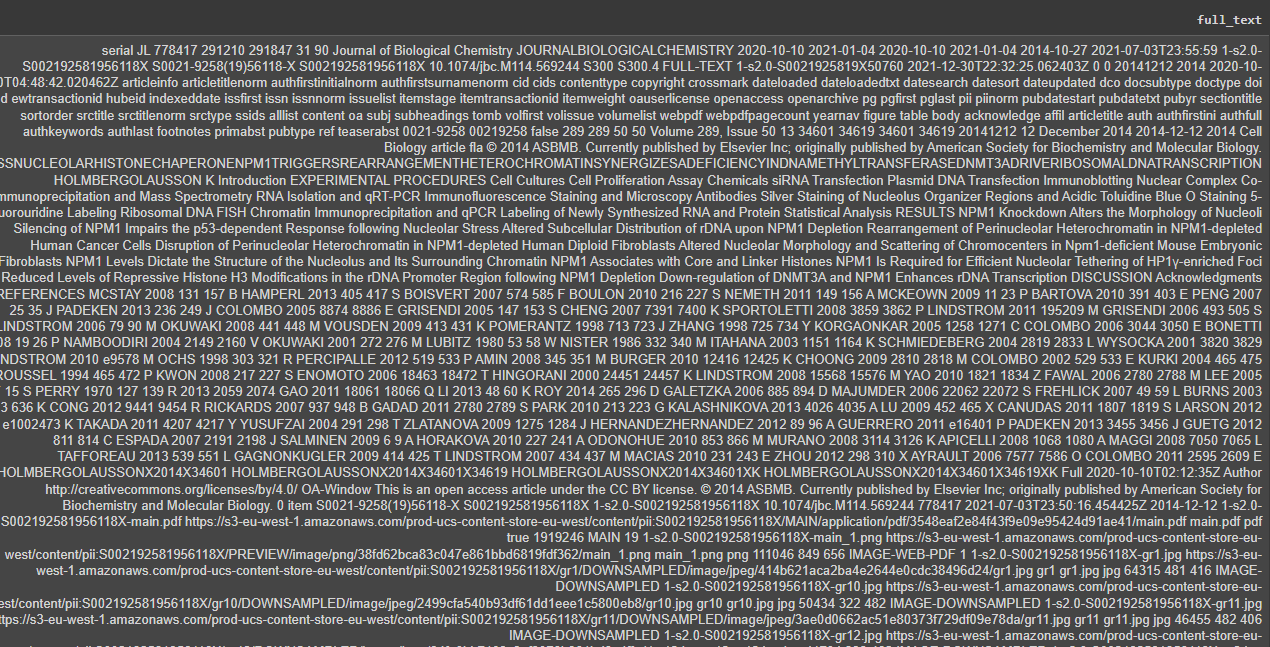

In [11]:
combined_df.loc[0,'full_text'][:1000]

'serial JL 778417 291210 291847 31 90 Journal of Biological Chemistry JOURNALBIOLOGICALCHEMISTRY 2020-10-10 2021-01-04 2020-10-10 2021-01-04 2014-10-27 2021-07-03T23:55:59 1-s2.0-S002192581956118X S0021-9258(19)56118-X S002192581956118X 10.1074/jbc.M114.569244 S300 S300.4 FULL-TEXT 1-s2.0-S0021925819X50760 2021-12-30T22:32:25.062403Z 0 0 20141212 2014 2020-10-10T04:48:42.020462Z articleinfo articletitlenorm authfirstinitialnorm authfirstsurnamenorm cid cids contenttype copyright crossmark dateloaded dateloadedtxt datesearch datesort dateupdated dco docsubtype doctype doi eid ewtransactionid hubeid indexeddate issfirst issn issnnorm issuelist itemstage itemtransactionid itemweight oauserlicense openaccess openarchive pg pgfirst pglast pii piinorm pubdatestart pubdatetxt pubyr sectiontitle sortorder srctitle srctitlenorm srctype ssids alllist content oa subj subheadings tomb volfirst volissue volumelist webpdf webpdfpagecount yearnav figure table body acknowledge affil articletitle auth 

## Evaluating the Text

As we can see, the text is not very valuable:

- It includes a lot of ineffective, unusable, and unreadable information.
- Only some parts have good text, while other parts do not.

## Finding a Solution

To improve the quality of the text, I will use **LangChain** to enhance it.

## Initial Approach

At first, I tried to take a whole part as the necessary text (chunks of 5000 each time). However, it seems that the information itself, when you get to it, is not clean also. Therefore, this approach is not suitable for obtaining quality data.

but i will show it any way down below.

## Overview of the Text Classification and Extraction Process

This code focuses on automating the analysis of academic papers to extract their main content. The system comprises two main components: `TextClassifier` and `ContentExtractor`.

### 1. TextClassifier

The `TextClassifier` class classifies text chunks from academic papers into categories:

- **START**: Indicates the beginning of the main content.
- **END**: Indicates the conclusion or end of the main content.
- **CONTENT**: Part of the main content but not start or end.
- **NONE**: Not part of the main content.

It utilizes a language model API to process and classify text based on a structured prompt.

### 2. ContentExtractor

The `ContentExtractor` class preprocesses the text and extracts relevant sections. It performs the following tasks:

- **Preprocessing**: Cleans the text to isolate the main content by identifying start and end markers.
- **Chunking**: Splits the text into manageable pieces for classification.
- **Content Extraction**: Compiles the classified content into a final output.

### 3. Processing a Paper

The `process_paper` function manages the workflow, accepting the paper's text and API key, and returning the extracted content. It validates input, initializes the classifier and extractor, and processes the text.

### 4. DataFrame Processing

The `process_dataframe` function allows batch processing of multiple papers stored in a DataFrame, iterating through each entry to apply the content extraction process.

### Conclusion

This system aims to streamline the extraction of valuable information from academic texts, enhancing accessibility for researchers and learners.

In [ ]:
#@title TextClassifier
import time
from langchain.prompts import PromptTemplate
from langchain_groq import ChatGroq
from langchain_core.runnables import RunnablePassthrough
import re

class TextClassifier:
    def __init__(self, api_key, model_name="mixtral-8x7b-32768"):
        self.llm = ChatGroq(model_name=model_name, api_key=api_key)
        self.prompt = PromptTemplate(
            input_variables=["title", "text"],
            template=(
                "You are an AI assistant specialized in analyzing academic papers. "
                "Given a chunk of text from an academic paper titled '{title}', your task is to: "
                "1. Identify if this chunk contains the start of the main content (typically the introduction). "
                "2. Identify if this chunk contains the end of the main content (typically the conclusion or discussion). "
                "3. Determine if this chunk is part of the main content. "
                "4. Ignore metadata, abstract, references, acknowledgments, and other non-main content sections. "
                "\nRespond with: "
                "'START' if it contains the start of the main content, "
                "'END' if it contains the end of the main content, "
                "'CONTENT' if it's part of the main content but neither start nor end, "
                "'NONE' if it's not part of the main content. "
                "\nIf the chunk contains both start and end, respond with 'START_END'. "
                "\nTitle: {title}\n\nText: {text}\n\nClassification:"
            )
        )
        self.chain = (
            {"title": RunnablePassthrough(), "text": RunnablePassthrough()}
            | self.prompt
            | self.llm
        )

    def classify_chunk(self, chunk, title):
        max_retries = 5
        base_wait_time = 60  # Initial wait time in seconds
        for attempt in range(max_retries):
            try:
                result = self.chain.invoke({"title": title, "text": chunk})
                classification = result.content.strip().upper()
                print(f"Chunk classification: {classification}")
                return classification
            except Exception as e:
                print(f"Error processing chunk (attempt {attempt + 1}/{max_retries}): {e}")
                if "rate_limit_exceeded" in str(e):
                    wait_time = base_wait_time * (2 ** attempt)  # Exponential backoff
                    print(f"Rate limit exceeded. Waiting for {wait_time} seconds before retrying.")
                    time.sleep(wait_time)
                elif attempt < max_retries - 1:
                    time.sleep(5)  # Wait for 5 seconds before retrying for other errors
                else:
                    print("All retry attempts failed. Returning NONE.")
                    return "NONE"  # If all retries fail, assume it's not part of the main content

class ContentExtractor:
    def __init__(self, classifier, chunk_size=5000, overlap=500):
        self.classifier = classifier
        self.chunk_size = chunk_size
        self.overlap = overlap

    def preprocess_text(self, text):
        # Find the start of the actual content
        start_markers = ["Abstract", "1 Introduction", "1. Introduction"]
        start_index = len(text)
        for marker in start_markers:
            index = text.find(marker)
            if index != -1 and index < start_index:
                start_index = index

        # Find the end of the content (before references)
        end_markers = ["References", "CRediT authorship contribution statement"]
        end_index = len(text)
        for marker in end_markers:
            index = text.rfind(marker)
            if index != -1 and index < end_index:
                end_index = index

        # Extract the main content
        main_content = text[start_index:end_index].strip()

        # Remove any remaining metadata-like patterns
        main_content = re.sub(r'^\s*(?:serial|journal|doi|articleinfo).*$', '', main_content, flags=re.MULTILINE)

        return main_content

    def extract_content(self, text, title):
        text = self.preprocess_text(text)
        print(f"Preprocessed text length: {len(text)} characters")
        print(f"First 200 characters of preprocessed text: {text[:200]}")
        chunks = self._split_text(text)
        print(f"Number of chunks: {len(chunks)}")

        if not chunks:
            print("No chunks created. Returning full preprocessed text.")
            return text

        content_chunks = []
        content_started = False

        for i, chunk in enumerate(chunks):
            print(f"Processing chunk {i+1}/{len(chunks)}, length: {len(chunk)}")
            classification = self.classifier.classify_chunk(chunk, title)

            if classification == "START_END":
                print("Found START_END chunk")
                return chunk
            elif classification == "START" or classification == "CONTENT":
                content_started = True
                content_chunks.append(chunk)
            elif classification == "END" and content_started:
                content_chunks.append(chunk)
                break
            elif classification == "NONE" and content_started:
                # If we encounter a NONE after content has started, it might be the end
                break

        extracted_content = ''.join(content_chunks)
        if not extracted_content:
            print("No content extracted. Returning full preprocessed text as fallback.")
            return text  # Fallback to returning the full preprocessed text if no content was extracted
        return extracted_content

    def _split_text(self, text):
        chunks = []
        start = 0
        while start < len(text):
            end = start + self.chunk_size
            if end > len(text):
                end = len(text)
            chunk = text[start:end]
            if chunk.strip():  # Only add non-empty chunks
                chunks.append(chunk)
            start += self.chunk_size - self.overlap
        print(f"Split text into {len(chunks)} chunks")
        if chunks:
            print(f"First chunk length: {len(chunks[0])}")
            print(f"First 200 characters of first chunk: {chunks[0][:200]}")
        return chunks

def process_paper(text, api_key, title="Large scale analysis of open MOOC reviews to support learners", model_name="mixtral-8x7b-32768", chunk_size=5000, overlap=500):
    print(f"Processing paper: {title}")
    print(f"Text length: {len(text)} characters")
    print(f"First 200 characters of input text: {text[:200]}")
    if not text.strip():
        print("Error: Input text is empty or only contains whitespace")
        return ""
    classifier = TextClassifier(api_key=api_key, model_name=model_name)
    extractor = ContentExtractor(classifier, chunk_size=chunk_size, overlap=overlap)
    extracted_content = extractor.extract_content(text, title)
    print(f"Extracted content length: {len(extracted_content)} characters")
    return extracted_content


def using_process_paper(text):
  # Ensure 'text' variable contains the paper content
  if 'text' not in locals() or not isinstance(text, str) or not text.strip():
    print("Error: 'text' variable is not properly defined or is empty")
  else:
    extracted_content = process_paper(text, userdata.get('LlamaKey'))
    print("First 500 characters of extracted content:")
    print(extracted_content[:500] + "...")

def process_dataframe(df, api_key, model_name="mixtral-8x7b-32768", chunk_size=5000, overlap=500):
    # Ensure the 'extracted_content' column exists
    if 'extracted_content' not in df.columns:
        df['extracted_content'] = ""

    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        title = row['title']
        full_text = row['full_text']
        extracted_content = process_paper(full_text, api_key, title=title, model_name=model_name, chunk_size=chunk_size, overlap=overlap)
        df.at[index, 'extracted_content'] = extracted_content
    df.to_csv('processed_dataframe.csv', index=False)
    return df

In [ ]:
df = process_dataframe(combined_df, userdata.get('LlamaKey'))


### Example Output


- Processing paper: Towards human-AI collaboration in the competency-based curriculum development process: The case of industrial engineering and management education
-Text length: 130863 characters
-First 200 characters of input text: serial JL 778123 291210 291804 31 90 Computers and Education: Artificial Intelligence COMPUTERSEDUCATIONARTIFICIALINTELLIGENCE 2024-06-14 2024-06-14 2024-06-15 2024-06-15 2024-06-20T12:20:07 1-s2.0-S2
Preprocessed text length: 96917 characters
First 200 characters of preprocessed text: 1 Introduction 2 Background theory and literature review 2.1 Competency-based education theory 2.2 Curriculum theory and design models 2.3 Engineering curriculum design and development 3 Materials and
-Split text into 22 chunks
-First chunk length: 5000
-First 200 characters of first chunk: 1 Introduction 2 Background theory and literature review 2.1 Competency-based education theory 2.2 Curriculum theory and design models 2.3 Engineering curriculum design and development 3 Materials
-Number of chunks: 22

- Processing chunk 1/22, length: 5000
- Chunk classification: CONTENT

- Processing chunk 2/22, length: 5000
- Chunk classification: CONTENT

- Processing chunk 3/22, length: 5000
- Chunk classification: THE PROVIDED CHUNK IS NOT THE START OR END OF THE MAIN - CONTENT. IT SEEMS TO CONTAIN METADATA, IMAGE FILES, AND A CITATION, WHICH ARE - NOT PART OF THE MAIN CONTENT. THEREFORE, THE CLASSIFICATION IS 'NONE'.

- Processing chunk 4/22, length: 5000
- Chunk classification: THIS TEXT CHUNK IS PART OF THE MAIN CONTENT, AS IT INCLUDES FIGURES, TABLES, AND REFERENCES TO VARIOUS STUDIES AND METHODS.  HOWEVER, IT DOES NOT CONTAIN THE START OR END OF THE MAIN CONTENT. THEREFORE, THE APPROPRIATE CLASSIFICATION IS 'CONTENT'.  

- Processing chunk 5/22, length: 5000
- Chunk classification: THIS CHUNK IS PART OF THE MAIN CONTENT BUT NEITHER START NOR END. THEREFORE, THE CLASSIFICATION IS 'CONTENT'. THE CHUNK GIVEN APPEARS TO BE A LIST OF TOPICS OR COMPETENCIES IN THE CURRICULUM OF INDUSTRIAL ENGINEERING AND MANAGEMENT EDUCATION, AND IS LIKELY FROM THE MAIN BODY OF THE PAPER AS IT DESCRIBES THE CONTENT. HOWEVER, IT DOESN'T CONTAIN THE START OR END OF THE MAIN CONTENT.

- .  
- .  
- .
  
- Chunk classification: CONTENT
- Processing chunk 22/22, length: 2417
- Chunk classification: CONTENT
- Extracted content length: 92417 characters

In [42]:
df = pd.read_csv('/content/processed_dataframe.csv')
processed_df = df.dropna(subset=['full_text'])
processed_df = processed_df.reset_index(drop=True)
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         22 non-null     int64 
 1   title              22 non-null     object
 2   authors            22 non-null     object
 3   journal            22 non-null     object
 4   year               22 non-null     int64 
 5   doi                22 non-null     object
 6   full_text          22 non-null     object
 7   extracted_content  22 non-null     object
dtypes: int64(2), object(6)
memory usage: 1.5+ KB


In [38]:
combined_df.loc[0,'full_text'][:1000]

'serial JL 778417 291210 291847 31 90 Journal of Biological Chemistry JOURNALBIOLOGICALCHEMISTRY 2020-10-10 2021-01-04 2020-10-10 2021-01-04 2014-10-27 2021-07-03T23:55:59 1-s2.0-S002192581956118X S0021-9258(19)56118-X S002192581956118X 10.1074/jbc.M114.569244 S300 S300.4 FULL-TEXT 1-s2.0-S0021925819X50760 2021-12-30T22:32:25.062403Z 0 0 20141212 2014 2020-10-10T04:48:42.020462Z articleinfo articletitlenorm authfirstinitialnorm authfirstsurnamenorm cid cids contenttype copyright crossmark dateloaded dateloadedtxt datesearch datesort dateupdated dco docsubtype doctype doi eid ewtransactionid hubeid indexeddate issfirst issn issnnorm issuelist itemstage itemtransactionid itemweight oauserlicense openaccess openarchive pg pgfirst pglast pii piinorm pubdatestart pubdatetxt pubyr sectiontitle sortorder srctitle srctitlenorm srctype ssids alllist content oa subj subheadings tomb volfirst volissue volumelist webpdf webpdfpagecount yearnav figure table body acknowledge affil articletitle auth 

In [49]:
processed_df.loc[0,'extracted_content']

'1 Introduction 2 Worst-case analysis as a minimax optimization 2.1 π -Orthogonality 2.2 Reformulation 3 Reversible MCMC 4 Numerical approach 4.1 Feasible set 4.2 Optimality conditions 4.3 Multiple solutions 5 Conclusions References ALDOUS D ANDRIEU 2008 343 373 C BROOKS 2011 S CHAPMANHALLCRCHANDBOOKSMODERNSTATISTICALMETHODS HANDBOOKMARKOVCHAINMONTECARLO CHEN 2012 2743 2762 T CHEN 2013 1956 1962 T CHU 2005 M NUMERICALMATHEMATICSSCIENTIFICCOMPUTATION INVERSEEIGENVALUEPROBLEMSTHEORYALGORITHMSAPPLICATIONS DESAI 1993 950 966 M DIACONIS 2000 726 752 P DIACONIS 1991 36 61 P FLETCHER 1987 R PRACTICALMETHODSOPTIMIZATION FRIGESSI 1992 610 628 A FULMAN 1999 1 13 J 1996 INTERDISCIPLINARYSTATISTICS MARKOVCHAINMONTECARLOINPRACTICE HWANG 2005 87 94 C INGRASSIA 1994 347 389 S IOSIFESCU 1980 M FINITEMARKOVPROCESSESAPPLICATIONS KEILSON 1979 J MARKOVCHAINMODELSRARITYEXPONENTIALITY LEWIS 1996 576 588 A MIRA 2001 340 350 A MIRA 2000 93 108 A NEAL 2004 R IMPROVINGASYMPTOTICVARIANCEMCMCESTIMATORSNONREVERSIB

In [37]:
processed_df.loc[1,'extracted_content'][:1000]

'Abstract In this study of C. elegans food response behavior, the underlying circuitry is identified by dopaminergic neurons signaling the presence of food to interneurons that release neuropeptides and regulate locomotion by conferring distinct motoneuron responses via specific neuropeptide receptor expression. Keywords FMRFamide neuropeptides behavioral switching optogenetics channelrhodopsin-2 halorhodopsin video tracking behavioral quantification premotor navigational regulation sensory integration Ca2+ imaging Introduction Neural circuits control complex behaviors and vary their activity in different behavioral states. For example, animals perform tactic behaviors, like food searching (Gutman et al., 2007), which require the interplay of strategic planning and basic locomotion. Locomotion patterns are adapted over many scales to enable movement under diverse conditions (DiGiovanna et al., 2016; Fang-Yen et al., 2010). For navigation, body posture and proprioceptive feedback are in

In [44]:
combined_total_length = combined_df['full_text'].str.len().sum()
processed_total_length = processed_df['extracted_content'].str.len().sum()

print(f"Total length of 'full_text' in combined_df: {combined_total_length}")
print(f"Total length of 'extracted_content' in processed_df: {processed_total_length}")

if combined_total_length > 0:
    ratio = processed_total_length / combined_total_length
    print(f"Ratio of processed to combined total length: {ratio:.2f}")
else:
    print("The total length of 'full_text' in combined_df is zero, ratio cannot be calculated.")

Total length of 'full_text' in combined_df: 2194693
Total length of 'extracted_content' in processed_df: 708659
Ratio of processed to combined total length: 0.32


## Observations and New Strategy

### Initial Challenges

As we can see, the differences between full text and extracted_content are remarkable. However, there are still areas for improvement:

### Observations:

1. For `processed_df.loc[1,'extracted_content'][:1000]`:
   - The text looks good and clean.

2. In other indexes, such as 0:
   - We can see that the relevant text is mixed with a lot of metadata.

## Reasons:

- I took too large parts of the text in each check regarding its content.
- This led to the inclusion of ineffective information.

### Revised Approach

To address these issues, I will:

- **Take Smaller Parts**: Instead of large chunks, I will process each part with an overlap of 500 and by that i will get smaller parts of the text. This should help in filtering out ineffective information more effectively.
- **Adjust Time Frame**: I will focus on articles from the year 2000 to 2024, rather than starting from 2013. This broader range might provide more relevant data.

By implementing these changes, I aim to improve the quality and relevance of the extracted information.


## Handling Rate Limits

To ensure the program runs smoothly even when the system is busy, I implemented a mechanism to prevent crashes by making the program wait when necessary. This is particularly important as I will be using substantial computing power and processing a large volume of data.

### Rationale for Using Rate Limit Handling

- **Increased Demand**: The upcoming tasks will require significant computational resources, as I will be checking a lot of data.
- **Preventing Crashes**: By managing rate limits effectively, I can avoid program crashes that could occur due to overwhelming the system.
- **Sustained Performance**: This approach allows for sustained performance over extended periods of data processing, ensuring that the workflow remains uninterrupted.

### Example of Rate Limit Handling

When a rate limit is exceeded, the program outputs an error message and waits for a specified time before retrying:

### Explanation

- **Error Handling**: The program detects when the rate limit is exceeded (error code 429) and outputs a detailed error message.
- **Wait Mechanism**: It waits for 60 seconds before attempting to retry, ensuring compliance with rate limits and preventing crashes.


## Key Changes in the Updated Code

- **Prompt Template Update**: The prompt now instructs the AI to identify segments of readable, relevant text suitable for NLP tasks, including abstracts, and exclude non-textual elements like tables and figures.

- **Class Name and Structure**: The class is now named `ContentExtractor`, focusing on extracting relevant content segments with start and end indices.

- **Classification Logic**: The classification system has been updated to use responses like `'RELEVANT'` with start and end indices, and `'NOT_RELEVANT'` if no suitable content is found.

- **Chunk Processing**: The text is split into chunks with overlap to ensure continuity, and each chunk is processed to extract relevant segments.

- **Error Handling**: Enhanced error handling with retry logic for API rate limits, returning `'NOT_RELEVANT'` if all attempts fail.

- **Data Saving**: The DataFrame processing function now saves results to `processed_dataframeSlices.csv`.

These updates improve the precision and efficiency of content extraction from academic papers.



# Expanding Dataset for Enhanced Content Analysis

The initial analysis was based on a dataset starting from 2013, with the LLM model extracting approximately 32% of the original text content.


Due of these limitations of our current dataset and API constraints,i will now load data starting from the year 2000, instead of 2013.

This expansion will significantly increase our dataset size and by that i aim to capture a wider variety of content types subjects and styles.


In [27]:
#@title TextClassifier New Version
import re
import time
from langchain.prompts import PromptTemplate
from langchain_groq import ChatGroq
from langchain_core.runnables import RunnablePassthrough

class ContentExtractor:
    def __init__(self, api_key, model_name="mixtral-8x7b-32768", chunk_size=5000, overlap=500):
        self.chunk_size = chunk_size
        self.overlap = overlap
        self.llm = ChatGroq(model_name=model_name, api_key=api_key)
        self.prompt = PromptTemplate(
            input_variables=["title", "text"],
            template=(
                "You are an AI assistant specialized in analyzing academic papers. "
                "Given a chunk of text from an academic paper titled '{title}', your task is to: "
                "1. Identify segments of readable, relevant text that are suitable for NLP tasks. "
                "2. Include the abstract if present, as it contains valuable information. "
                "3. Exclude non-textual elements like tables, figures, and their captions. "
                "4. Ignore formatting instructions, page numbers, and other non-content text. "
                "\nProvide the start and end indices of relevant content segments within this chunk. "
                "\nRespond in the following format: "
                "RELEVANT: start1-end1, start2-end2, ... "
                "or "
                "NOT_RELEVANT "
                "if the chunk doesn't contain any suitable content. "
                "\nTitle: {title}\n\nText: {text}\n\nClassification:"
            )
        )
        self.chain = (
            {"title": RunnablePassthrough(), "text": RunnablePassthrough()}
            | self.prompt
            | self.llm
        )

    def extract_content(self, text, title):
        chunks = self._split_text(text)
        print(f"Number of chunks: {len(chunks)}")

        extracted_content = []
        for i, chunk in enumerate(chunks):
            print("*" * 50)
            print(f"Processing chunk {i+1}/{len(chunks)}, length: {len(chunk)}")
            classification = self.classify_chunk(chunk, title)

            if classification.startswith("RELEVANT:"):
                segments = self._extract_segments(chunk, classification)
                extracted_content.extend(segments)
                print(f"  Extracted {len(segments)} segments from chunk {i+1}")
                print(f"  Total extracted so far: {sum(len(s) for s in extracted_content)} characters")
            else:
                print(f"  No relevant content in chunk {i+1}")

        final_content = ' '.join(extracted_content)
        print(f"Final extracted content length: {len(final_content)} characters")
        print(f"Extraction ratio: {len(final_content) / len(text):.2%}")
        print("#" * 50)
        return final_content

    def classify_chunk(self, chunk, title):
        max_retries = 5
        base_wait_time = 60  # 1 minute
        for attempt in range(max_retries):
            try:
                result = self.chain.invoke({"title": title, "text": chunk})
                classification = result.content.strip().upper()
                print(f"Chunk classification: {classification}")  # Debug print
                return classification
            except Exception as e:
                print(f"Error processing chunk (attempt {attempt + 1}/{max_retries}): {e}")
                if "rate_limit_exceeded" in str(e):
                    wait_time = base_wait_time * (2 ** attempt)  # Exponential backoff
                    print(f"Rate limit exceeded. Waiting for {wait_time} seconds before retrying.")
                    time.sleep(wait_time)
                elif attempt < max_retries - 1:
                    time.sleep(5)  # Wait for 5 seconds before retrying for other errors
                else:
                    print("All retry attempts failed. Returning NOT_RELEVANT.")  # Debug print
                    return "NOT_RELEVANT"

    def _extract_segments(self, chunk, classification):
        segments = []
        relevant_part = classification.split(":")[1].strip()
        pairs = re.findall(r'(\d+)\s*-\s*(\d+)', relevant_part)

        for start, end in pairs:
            try:
                start, end = int(start), int(end)
                if start < end and start < len(chunk):
                    end = min(end, len(chunk))
                    segments.append(chunk[start:end].strip())
            except ValueError as e:
                print(f"Warning: Could not parse segment pair '{start}-{end}'. Error: {e}")

        # If no valid segments were found, try to extract any continuous text
        if not segments:
            continuous_text = re.sub(r'\s+', ' ', relevant_part).strip()
            if continuous_text:
                segments.append(continuous_text)

        return segments

    def _split_text(self, text):
        chunks = []
        start = 0
        while start < len(text):
            end = start + self.chunk_size
            if end > len(text):
                end = len(text)
            chunks.append(text[start:end])
            start += self.chunk_size - self.overlap
        return chunks

    def process_chunk(self, text_chunk):
        try:
            # Remove figure captions and other non-relevant sections
            text_chunk = re.sub(r'\bFIGURE\b.*?(?=\n\n)', '', text_chunk, flags=re.DOTALL)
            text_chunk = re.sub(r'\bTABLE\b.*?(?=\n\n)', '', text_chunk, flags=re.DOTALL)

            # Split into sentences for better processing
            sentences = re.split(r'\.\s+', text_chunk)

            # Process each sentence
            relevant_sentences = []
            for sentence in sentences:
                if self.is_relevant_text(sentence):
                    relevant_sentences.append(sentence)

            return ' '.join(relevant_sentences)
        except Exception as e:
            print(f"Error processing chunk: {e}")
            return ""

    def is_relevant_text(self, text):
        # Define criteria for relevant text, can be adjusted
        return len(text.split()) > 20  # Minimum number of words

def process_paper(text, api_key, title, model_name="mixtral-8x7b-32768", chunk_size=5000, overlap=500):
    print(f"Processing paper: {title}")
    print(f"Original text length: {len(text)} characters")

    extractor = ContentExtractor(api_key, model_name, chunk_size, overlap)
    extracted_content = extractor.extract_content(text, title)

    print(f"Extracted content length: {len(extracted_content)} characters")
    print(f"First 200 characters of extracted content: {extracted_content[:200]}")
    return extracted_content

def process_dataframe(df, api_key, model_name="mixtral-8x7b-32768", chunk_size=5000, overlap=500):
    if 'extracted_content' not in df.columns:
        df['extracted_content'] = ""

    for index, row in df.iterrows():
        title = row['title']
        full_text = row['full_text']
        extracted_content = process_paper(full_text, api_key, title, model_name, chunk_size, overlap)
        df.at[index, 'extracted_content'] = extracted_content
        df.to_csv('processed_dataframe_final.csv', index=False)
    return df


In [ ]:
downloadAllAvailableData(2000)
combineCsvs(2000)

In [ ]:
df = pd.read_csv('/content/combined_articles_2000_2024.csv')

In [32]:
combined_df = df.dropna(subset=['full_text'])
df = process_dataframe(combined_df, userdata.get('LlamaKey'))

## Example Outputs


Processing paper: Prosody and lexical accuracy in flat affect schizophrenia
Original text length: 49325 characters
Number of chunks: 11
**************************************************
Processing chunk 1/11, length: 5000
Chunk classification: RELEVANT: 527-547

EXPLANATION:

THE RELEVANT TEXT FOR NLP TASKS IS THE TITLE AND THE ABSTRACT OF THE PAPER, WHICH PROVIDES A SUMMARY OF THE STUDY. IN THIS CASE, THE ABSTRACT STARTS AT INDEX 527 AND ENDS AT INDEX 547.

 IRRELEVANT TEXT (EXCLUDED):

- SERIAL NUMBERS, CODES, AND DOCUMENT IDENTIFIERS
- DATE AND TIME STAMPS
- VERSION AND FORMATTING INFORMATION
- COPYRIGHT NOTICES
- PAGE NUMBERS
- FIGURE AND TABLE CAPTIONS
- REFERENCES
- CITATIONS AND BIBLIOGRAPHIC INFORMATION
- FUNDING AND OPEN ACCESS INFORMATION
- URLS AND LINKS
- IMAGE FILE FORMATS AND SIZES
- IMAGE-SPECIFIC INFORMATION (THUMBNAIL, DOWNSAMPLED, GIF, PNG)
  Extracted 1 segments from chunk 1
  Total extracted so far: 20 characters
**************************************************
Processing chunk 2/11, length: 5000
Chunk classification: RELEVANT: 641-END, AS THIS SEGMENT CONTAINS THE ABSTRACT OF THE PAPER, WHICH PROVIDES A SUMMARY OF THE STUDY AND ITS FINDINGS. THE START INDEX (641) IS CALCULATED FROM THE BEGINNING OF THE PROVIDED 'TEXT' FIELD.
  Extracted 1 segments from chunk 2
  Total extracted so far: 221 characters
**************************************************
Processing chunk 3/11, length: 5000
Chunk classification: RELEVANT: 0-225 (ENTIRE TEXT)

THE PROVIDED CHUNK OF TEXT CONTAINS VALUABLE INFORMATION ABOUT THE TOPIC 'PROSODY AND LEXICAL ACCURACY IN FLAT AFFECT SCHIZOPHRENIA'. IT INCLUDES THE ABSTRACT, WHICH SUMMARIZES THE MAIN POINTS OF THE PAPER, AND PROVIDES A DETAILED EXPLANATION OF THE CONCEPTS RELATED TO FLAT AFFECT, EMOTION, LEXICAL CHANNEL, AND PROSODY. ADDITIONALLY, IT DESCRIBES VARIOUS STUDIES AND FINDINGS ON THE SUBJECT. THERE ARE NO NON-TEXTUAL ELEMENTS, FORMATTING INSTRUCTIONS, OR PAGE NUMBERS PRESENT THAT NEED TO BE EXCLUDED.
  Extracted 1 segments from chunk 3
  Total extracted so far: 446 characters
**************************************************
Processing chunk 4/11, length: 5000
Chunk classification: RELEVANT: 0-462

EXPLANATION:
THE ENTIRE CHUNK OF TEXT IS RELEVANT FOR NLP TASKS AS IT CONTAINS VALUABLE INFORMATION ABOUT THE RESEARCH STUDY, INCLUDING THE ABSTRACT, THE RESEARCH METHODS, AND THE DETAILS ABOUT THE SUBJECTS. IT DISCUSSES THE USE OF COMPUTERIZED WORD-COUNT SYSTEMS AND THE DARTMOUTH ADAPTATION OF THE GENERAL INQUIRER CONTENT ANALYSIS PROGRAM TO EXAMINE THE WORDS USED IN A FREE SPEECH TASK BY FLAT AFFECT AND NON-FLAT AFFECT SCHIZOPHRENIC SUBJECTS. THE TEXT ALSO INCLUDES INFORMATION ABOUT THE CLASSIFICATION OF SUBJECTS INTO FLAT AND NON-FLAT GROUPS BASED ON CLINICAL RATINGS, AS WELL AS THE USE OF TWO GENERAL INQUIRER TAGS: PLEASURE AND DISTRESS. ADDITIONALLY, THE TEXT PROVIDES DETAILS ABOUT THE SUBJECTS, INCLUDING THEIR ETHNICITY, AGE, AND EDUCATION LEVEL.
  Extracted 1 segments from chunk 4
  Total extracted so far: 907 characters
**************************************************
Processing chunk 5/11, length: 5000
Chunk classification: RELEVANT: 0-233, 242-375, 383-456

EXPLANATION:

* 0-233: THIS SEGMENT DESCRIBES THE METHOD FOR CATEGORIZING PATIENTS INTO FLAT AND NON-FLAT AFFECT GROUPS BASED ON FIVE ITEMS RELATED TO GESTURE, FACIAL EXPRESSION, VOCAL INFLECTION, AND EMOTIONAL RESPONSIVENESS. IT ALSO EXPLAINS THE RATIONALE FOR OMITTING CERTAIN ITEMS AND THE HIGH INTERNAL CONSISTENCY (Α=0.96) OF THE FIVE ITEMS.
* 242-375: THIS SEGMENT EXPLAINS THE MEASURE FOR NEUROLEPTIC-INDUCED EXTRA-PYRAMIDAL SIDE EFFECTS (EPSE) AND THE RATIONALE FOR OMITTING BRADYKINESIA. IT ALSO DISCUSSES THE COMPLEXITY OF THE RELATIONSHIP BETWEEN EPSE AND NEUROLEPTIC DOSE, CITING VARIOUS STUDIES AND EXPERIMENTS.
* 383-456: THIS SEGMENT DESCRIBES THE PROCEDURES FOR RECORDING THE SUBJECT AND INTERVIEWER, WHICH COULD BE RELEVANT FOR NLP TASKS INVOLVING AUDIO DATA.
  Extracted 3 segments from chunk 5
  Total extracted so far: 1344 characters
**************************************************
Processing chunk 6/11, length: 5000
Chunk classification: RELEVANT: 'TITLE': 'PROSODY AND LEXICAL ACCURACY IN FLAT AFFECT SCHIZOPHRENIA', 'TEXT': "THESE ARE, TYPICALLY, PROPER NOUNS OR UNCOMMON WORDS. THE CATEGORIES FOR THE TAGS INCLUDE PERSONAL (SELF, SELVES, OTHER), EVALUATIVE (GOOD, BAD, DEVIATION), AFFECTIVE (AFFECTION, DISTRESS, PLEASURE), ETC. (SEE STONE ET AL., 1966 FOR A COMPLETE DESCRIPTION). EACH WORD OR STEM IS ASSIGNED TO AT LEAST ONE, BUT SOMETIMES MORE, OF THE 83 CATEGORIES. FOR EXAMPLE, THE WORD ‘ACHE’ IS ASSIGNED TO THE DISTRESS CATEGORY, WHEREAS THE WORD ‘TROUSERS’ IS ASSIGNED TO BOTH THE CLOTHING AND MALE THEME CATEGORIES. WE USED THE RESULTS FOR PLEASURE AND DISTRESS WITH THE TRANSCRIPTS OF THE HAPPY AND SAD NARRATIVES. THE PLEASURE CATEGORY CONTAINS 49 WORDS AND WORD STEMS CONNOTING POSITIVE AFFECTIVE EXPERIENCES. CATEGORY ENTRIES INCLUDE LAUGH, HAPPY, ENJOY AND PLEASANT. THE DISTRESS CATEGORY CONTAINS 129 ENTRIES INCLUDING UPSET, TRAGIC, INSECURE AND SAD. THE UNIT FOR THIS MEASURE IS THE NUMBER OF TAGGED IN-CATEGORY WORDS DIVIDED BY THE TOTAL NUMBER OF TAGGED WORDS TIMES 100. 3 RESULTS 3.1 ACOUSTIC ANALYSIS THE RESULTS FOR THE ACOUSTIC ANALYSIS ARE PRESENTED IN TABLE 2 . THE SPEECH OF SUBJECTS IN THE FLAT AFFECT GROUP HAD LESS INFLECTION THAN THAT OF THE NORMAL CONTROLS. THE EFFECT SIZE FOR THE DIF"

EXPLANATION:
THE TITLE AND THE PROCEDURES SECTION PROVIDE RELEVANT CONTEXT FOR NLP TASKS, WHILE THE GENERAL INQUIRER PROGRAM SECTION OUTLINES THE METHODOLOGY FOR CONTENT ANALYSIS. THE ACOUSTIC ANALYSIS SECTION PRESENTS RESULTS THAT CAN BE PROCESSED FOR NLP TASKS. THE REST OF THE TEXT CONTAINS IRRELEVANT INFORMATION SUCH AS TABLE NUMBERS, FIGURE CAPTIONS, AND FORMATTING INSTRUCTIONS.
  Extracted 1 segments from chunk 6
  Total extracted so far: 1351 characters

.
.
.
.

Final extracted content length: 2693 characters

Extraction ratio: 5.46%


# Another part


Processing chunk 28/30, length: 5000

Chunk classification: RELEVANT: 58-214, 221-274, 280-353, 360-431, 437-450,

456-513, 520-587, 594-649, 656-713, 720-775, 781-836, 842-855, 861-896,

897-936, 942-981

EXPLANATION:

THE RELEVANT SEGMENTS ARE:

- 58-214: SEYMOUR ET AL., 2018 - FULL TEXT OF THE PAPER "ACTORS, AVATARS, AND AGENTS: POTENTIALS AND IMPLICATIONS OF NATURAL FACE TECHNOLOGY FOR THE CREATION OF REALISTIC VISUAL PRESENCE"


- 221-274: SEYMOUR ET AL., 2023 - FULL TEXT OF THE PAPER "AI WITH A HUMAN FACE: THE CASE FOR - AND AGAINST - DIGITAL EMPLOYEES"


- 280-353: SEZGIN, 2024 - FULL TEXT OF THE PAPER "REDEFINING VIRTUAL ASSISTANTS IN HEALTH CARE: THE FUTURE WITH LARGE LANGUAGE MODELS"

- 360-431: SHANAHAN ET AL., 2023 - FULL TEXT OF THE PAPER "ROLE PLAY WITH LARGE LANGUAGE MODELS"

- 437-450: SHARMA, 2024 - A PARAGRAPH FROM THE ARTICLE "COGNITION EMERGES FROM STEALTH TO LAUNCH AI SOFTWARE ENGINEER DEVIN"

- 456-513: SIGGELKOW AND TERWIESCH, 2023 - FULL TEXT OF THE ARTICLE "CREATE WINNING CUSTOMER EXPERIENCES WITH GENERATIVE AI"

- 520-587: SINGHAL ET AL., 2023 - FULL TEXT OF THE PAPER "LARGE LANGUAGE MODELS ENCODE CLINICAL KNOWLEDGE"

- 594-649: STRACHAN ET AL., 2024 - FULL TEXT OF THE PAPER "TESTING THEORY OF MIND IN LARGE LANGUAGE MODELS AND HUMANS"

- 656-713: SYED ET AL., 2020 - FULL TEXT OF THE PAPER "ROBOTIC PROCESS AUTOMATION: CONTEMPORARY THEMES AND CHALLENGES"

- 720-775: TAO ET AL., 2024 - FULL TEXT OF THE ARTICLE "MAGIS: LLM-BASED MULTI-AGENT FRAMEWORK FOR GITHUB ISSUE RESOLUTION"

- 781-836: TARAFDAR ET AL., 2023 - FULL TEXT OF THE PAPER "ALGORITHMS AS CO-WORKERS: HUMAN ALGORITHM ROLE INTERACTIONS IN ALGORITHMIC WORK"

- 842-855: TITLE AND ABSTRACT OF THE PAPER "CONCEPTUALIZING GENERATIVE AI AS STYLE ENGINES: APPLICATION ARCHETYPES AND IMPLICATIONS"

- 861-896: THE CONVERSATION ARTICLE BY SCHARTH, M. (2023) - "HOW TO PERFECT YOUR PROMPT WRITING FOR CHATGPT, MIDJOURNEY AND OTHER AI GENERATORS"

- 897-936: REFERENCE LIST OF THE PROVIDED TEXT.
  
Extracted 15 segments from chunk 28
Total extracted so far: 10223 characters

**************************************************

Processing chunk 29/30, length: 4842

Chunk classification: RELEVANT: 15-152, 189-267, 281-343, 367-416, 471-589,

733-741, 751-759, 775-856, 867-931, 939-950, 953-973, 1035-1043

EXPLANATION:

- 15-152: ABSTRACT OF THE PAPER 'CONCEPTUALIZING GENERATIVE AI AS STYLE ENGINES: APPLICATION ARCHETYPES AND IMPLICATIONS'

- 189-267: PAPER 'ALGORITHMS AS CO-WORKERS: HUMAN ALGORITHM ROLE INTERACTIONS IN ALGORITHMIC WORK' BY TARAFDAR, M., PAGE, X., & MARABELLI, M.

- 281-343: PAPER 'MEASURING AI SYSTEMS BEYOND ACCURACY' BY TURRI, V., DZOMBAK, R., HEIM, E., VANHOUDNOS, N., PALAT, J., & SINHA, A.

- 367-416: PAPER 'EMERGENT ANALOGICAL REASONING IN LARGE LANGUAGE MODELS' BY WEBB, T., HOLYOAK, K.J., & LU, H.

- 471-589: PAPER 'DEEP LEARNING FOR DIALOGUE SYSTEMS: CHIT-CHAT AND BEYOND' BY YAN, R., LI, J., YU, Z., ET AL.

- 733-741: CITATION OF PAPER 'FROM FREQUENCY TO MEANING: VECTOR SPACE MODELS OF SEMANTICS' BY TURNEY, P.D., & PANTEL, P.

- 751-759: CITATION OF PAPER 'ON THE DEEP STRUCTURE OF INFORMATION SYSTEMS' BY WAND, Y., & WEBER, R.

- 775-856: PAPER 'LEVERAGING GENERATIVE AI AND LARGE LANGUAGE MODELS: A COMPREHENSIVE ROADMAP FOR HEALTHCARE INTEGRATION' BY YU, P., XU, H., HU, X., & DENG, C.

- 867-931: PAPER 'LLM AS A MASTERMIND: A SURVEY OF STRATEGIC REASONING WITH LARGE LANGUAGE MODELS' BY ZHANG, Y., MAO, S., GE, T., WANG, X., DE WYNTER, A., XIA, Y., WU, W., SONG, T., LAN, M., & WEI, F.

- 939-950: CITATION OF PAPER 'THE NEW YORK TIMES’ AI COPYRIGHT LAWSUIT SHOWS THAT FORGIVENESS MIGHT NOT BE BETTER THAN PERMISSION' BY VAUGHAN, P.

- 953-973: PAPER 'A PILOT STUDY OF MEASURING EMOTIONAL RESPONSE AND PERCEPTION OF LLM-GENERATED QUESTIONNAIRE AND HUMAN-GENERATED QUESTIONNAIRES' BY ZOU, Z., MUBIN, O., ALNAJJAR, F., & ALI, L.

- 1035-1043: CITATION OF PAPER 'ATTENTION IS ALL YOU NEED' BY VASWANI, A., SHAZEER, N., PARMAR, N., ET AL.
  
Extracted 12 segments from chunk 29
Total extracted so far: 10864 characters
**************************************************
Processing chunk 30/30, length: 342
Chunk classification: NOT_RELEVANT

EXPLANATION:

THE PROVIDED TEXT DOES NOT CONTAIN ANY READABLE, RELEVANT SEGMENTS SUITABLE FOR NLP TASKS. IT APPEARS TO BE A CITATION STRING THAT INCLUDES THE TITLE OF A PAPER AND ITS ASSOCIATED METADATA, SUCH AS THE AUTHORS' NAMES, JOURNAL NAME, PUBLICATION YEAR, AND DOI.

  No relevant content in chunk 30


Final extracted content length: 10971 characters

Extraction ratio: 8.38%

In [6]:
#@title loading the new ready data from csv
def readData():
  df = pd.read_csv('/content/processed_dataframe_final.csv')
  df = df.dropna(subset=['extracted_content'])
  processor = initializedDataAnalyzer(df, 'extracted_content')
  processor.process_text()
  processor.print_stats()
  return df, processor.get_sentences(),processor
df, sentences,processor = readData()

🔄 Processing text data from DataFrame column 'extracted_content'...
Processed 2027 sentences.
📊 Processing Statistics:
   Total sentences: 2027

📜 First 10 sentences (truncated to 100 characters):
   1. ody Fluency Motor expression....
   2. 1 Introduction Flat affect is a cardinal sign of the negative syndrome of schizophrenia....
   3. In flat affect, facial, vocal and gestural channels of display are reduced....
   4. However, patients with flat af rated as more emotionally intense....
   5. However, when judges were provided only lexical but not prosodic information, they could not differe...
   6. Thus, it appears that flat affect interferes with selective aspects of prosody....
   7. Content analysis of speech samples has been used to establish lexical correlates of personality trai...
   8. We omitted the inappropriate affect item, which was omitted by most workers, and the global item....
   9. By Cronbach (1951) coherence the five items yield an α=0.96 in the current data set.

In [83]:
df.columns

Index(['title', 'authors', 'journal', 'year', 'doi', 'full_text', 'extracted_content'], dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              31 non-null     object
 1   authors            31 non-null     object
 2   journal            31 non-null     object
 3   year               31 non-null     int64 
 4   doi                31 non-null     object
 5   full_text          31 non-null     object
 6   extracted_content  31 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB




**I did it!** (kind of)

The text quality has significantly improved, with clearer, more relevant information extracted from academic papers.

I am pleased with the outcome and feel that I have achieved my goal of enhancing the text processing workflow!


# Exploratory Data Analysis of Academic Papers

Before proceeding further, let's examine a portion of the Exploratory Data Analysis (EDA) for the original data vs the extracted content from it. This will help us understand:

1. The types of articles we are working with
2. How the analysis looks with the original content text


🤖 Running Full EDA Pipeline

📌 Basic Information
💡 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     31 non-null     object 
 1   authors                   31 non-null     object 
 2   journal                   31 non-null     object 
 3   year                      31 non-null     int64  
 4   doi                       31 non-null     object 
 5   full_text                 31 non-null     object 
 6   extracted_content         31 non-null     object 
 7   full_text_length          31 non-null     int64  
 8   extracted_content_length  31 non-null     int64  
 9   extraction_ratio          31 non-null     float64
 10  sentiment                 31 non-null     float64
dtypes: float64(2), int64(3), object(6)
memory usage: 2.8+ KB
None

📌 Year Distribution


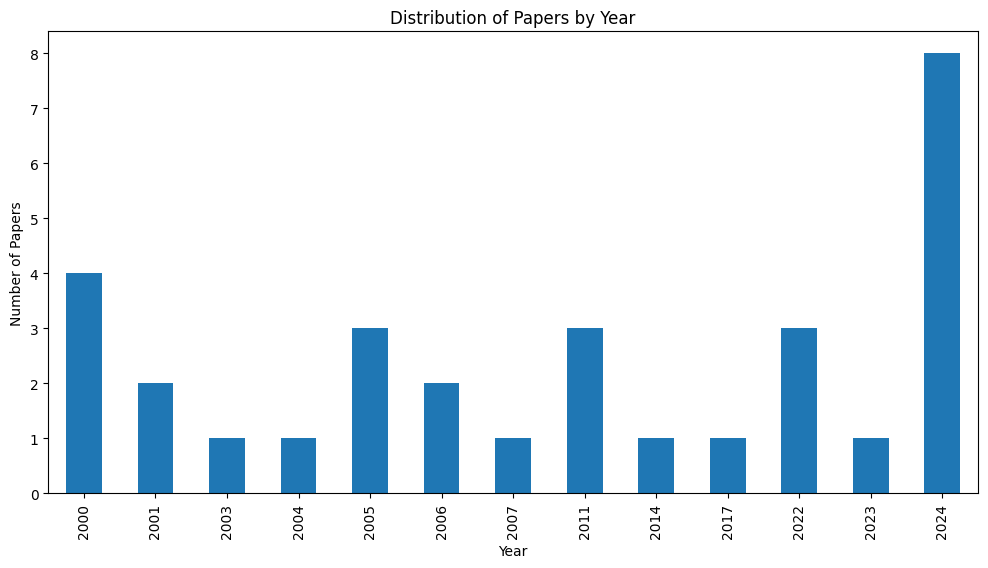

💡 Plotted the distribution of papers by year.

📌 Journal Distribution


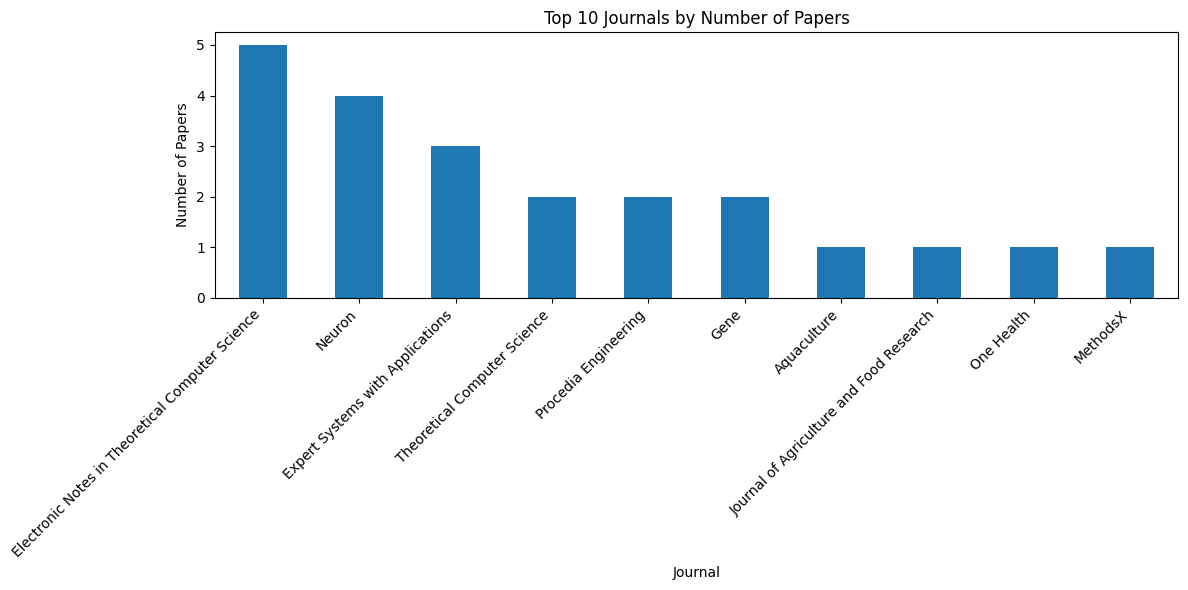

💡 Plotted the top 10 journals by number of papers.

📌 Author Productivity


<Figure size 1200x600 with 0 Axes>

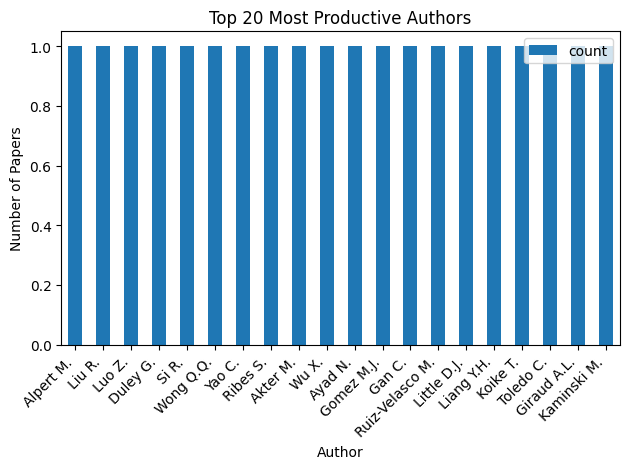

💡 Plotted the top 20 most productive authors.

📌 Text Length Analysis


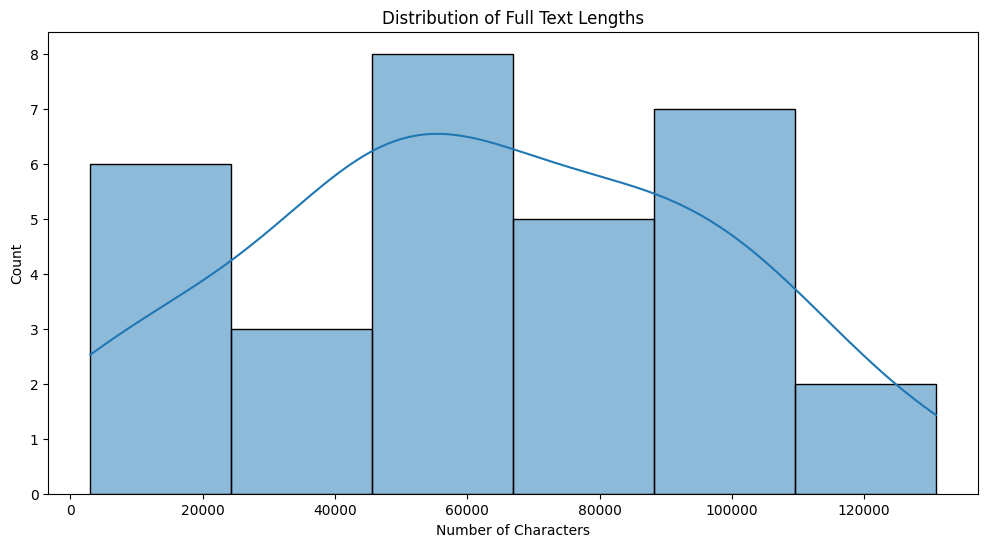

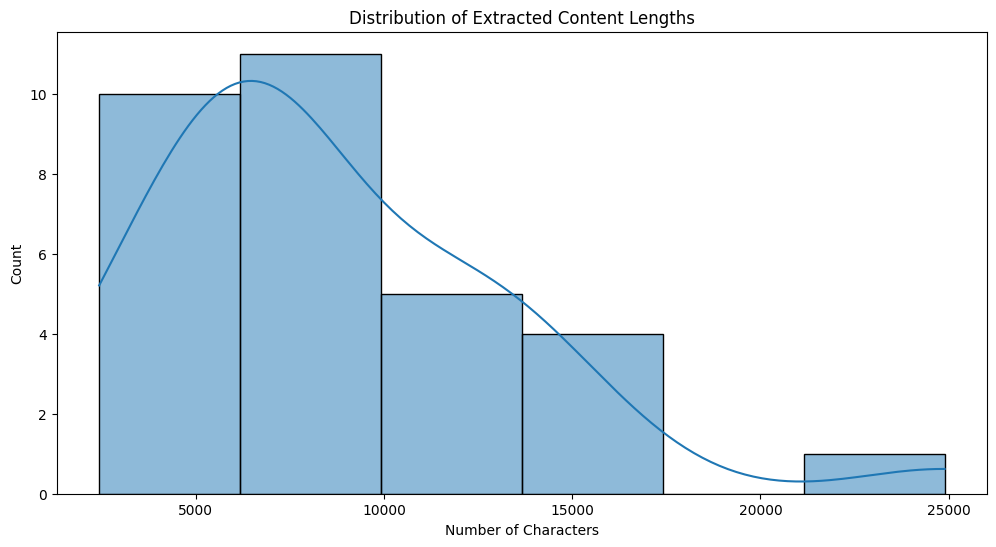

💡 Plotted the distribution of text lengths for full text and extracted content.

📌 Extraction Efficiency


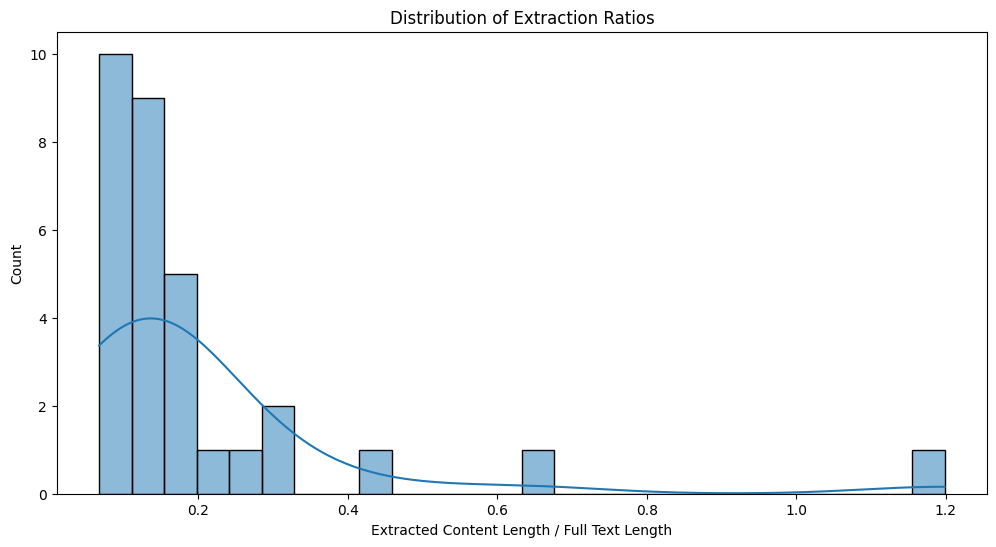

💡 Mean extraction ratio: 0.20
💡 Median extraction ratio: 0.14

📌 Word Cloud - extracted_content


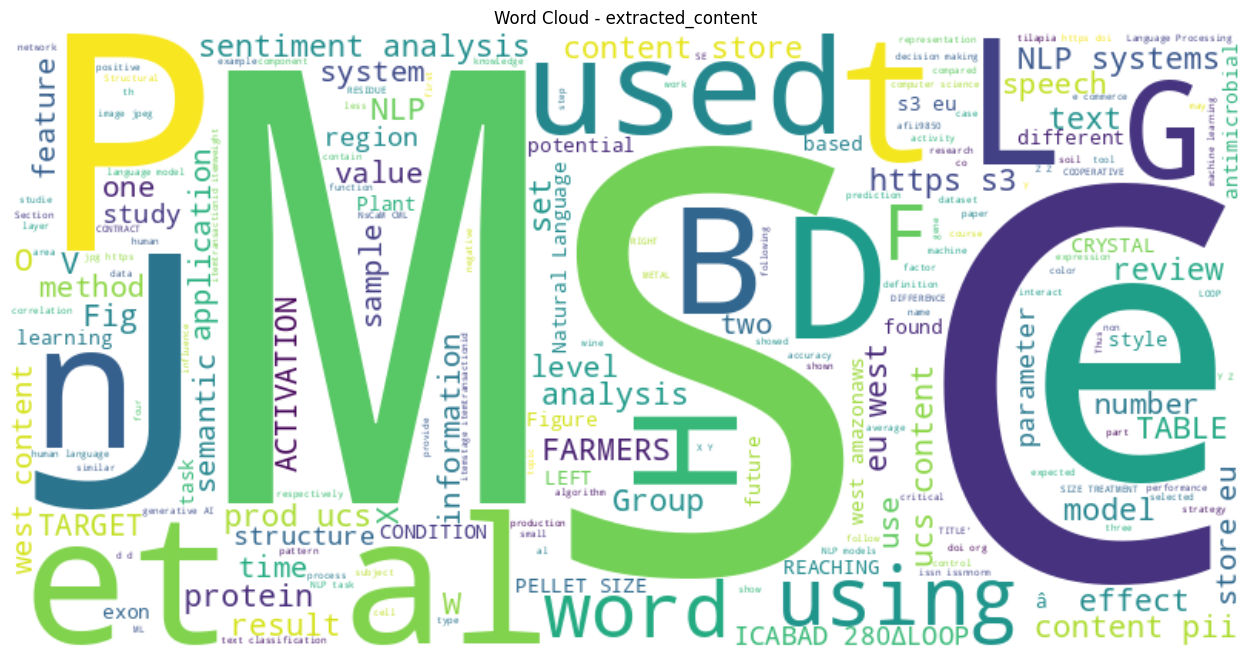

💡 Generated word cloud for the 'extracted_content' column.

📌 Common Words Analysis - extracted_content


<Figure size 1200x600 with 0 Axes>

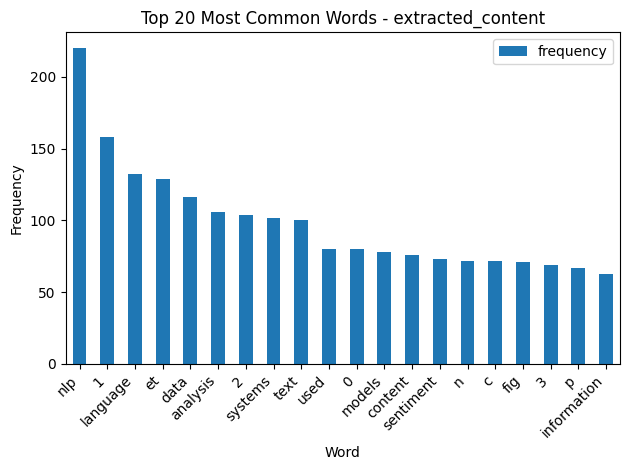

💡 Plotted the top 20 most common words in the 'extracted_content' column.

📌 Topic Modeling
💡 Topic 1: trivial, 2a, responds, states, controls, equivalence, variant, tem, unrelated, frequency
💡 Topic 2: trivial, 2a, responds, states, controls, equivalence, variant, tem, unrelated, frequency
💡 Topic 3: trivial, 2a, responds, states, controls, equivalence, variant, tem, unrelated, frequency
💡 Topic 4: content, et, al, analysis, 2024, sentiment, jpg, 10, image, fig
💡 Topic 5: trivial, 2a, responds, states, controls, equivalence, variant, tem, unrelated, frequency

📌 Sentiment Analysis


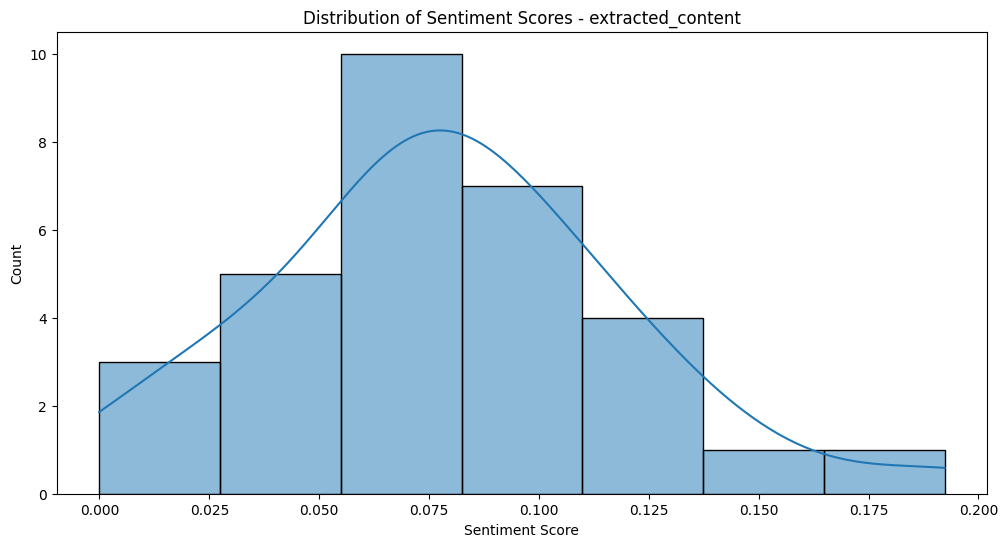

💡 Mean sentiment score: 0.08
💡 Median sentiment score: 0.08

📌 Citations Analysis
⚠️ Citations data not available in the dataset.

📌 Correlation Analysis


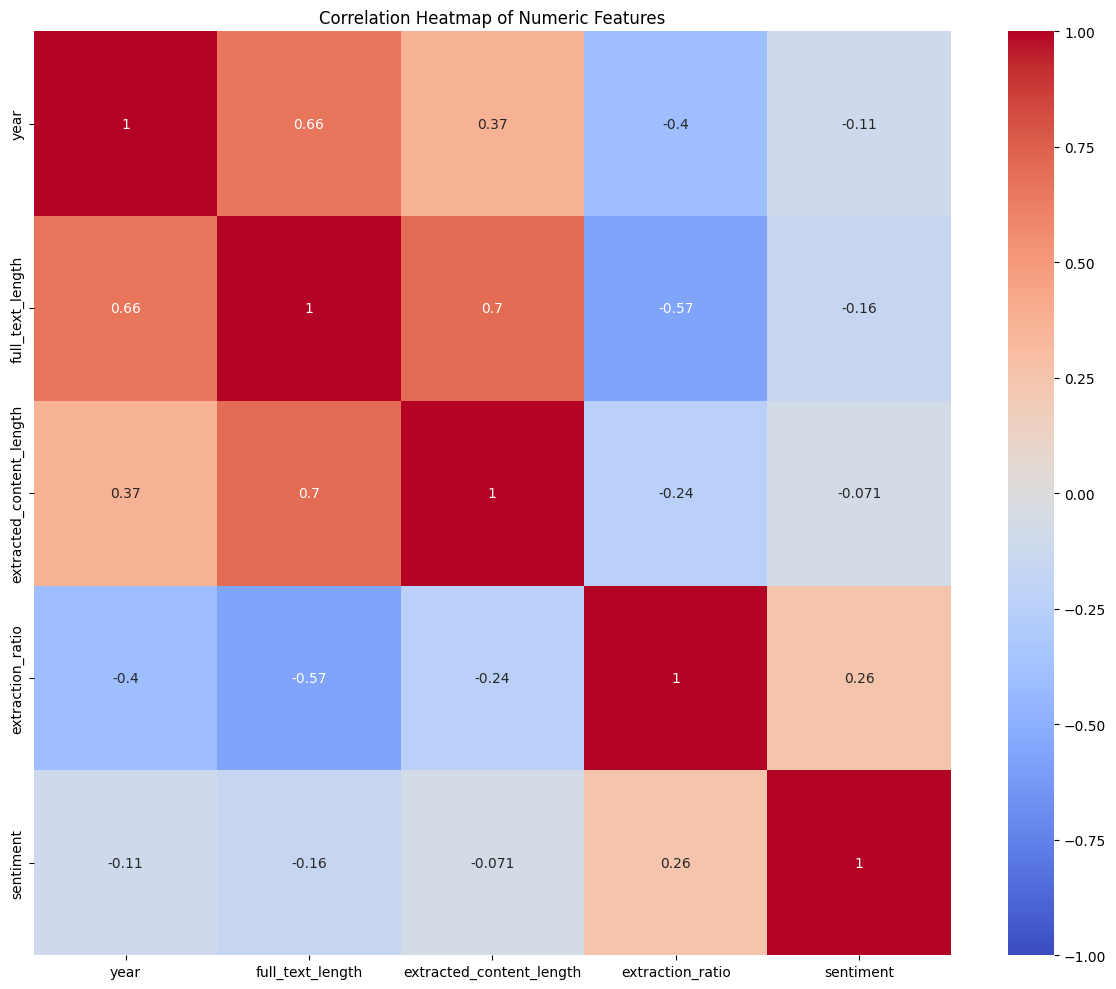

💡 Generated correlation heatmap for numeric features.
✅ Full EDA pipeline completed.


In [95]:
#@title AcademicPaperEDA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from textblob import TextBlob
import re
class AcademicPaperEDA:
    def __init__(self, df):
        self.df = df
        self.stop_words = set(stopwords.words('english'))
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        self.fp = FancyPrinter()

    def year_distribution(self):
        self.fp.subheader("Year Distribution")
        plt.figure(figsize=(12, 6))
        self.df['year'].value_counts().sort_index().plot(kind='bar')
        plt.title('Distribution of Papers by Year')
        plt.xlabel('Year')
        plt.ylabel('Number of Papers')
        plt.show()
        self.fp.info("Plotted the distribution of papers by year.")

    def journal_distribution(self, top_n=10):
        self.fp.subheader("Journal Distribution")
        plt.figure(figsize=(12, 6))
        self.df['journal'].value_counts().nlargest(top_n).plot(kind='bar')
        plt.title(f'Top {top_n} Journals by Number of Papers')
        plt.xlabel('Journal')
        plt.ylabel('Number of Papers')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        self.fp.info(f"Plotted the top {top_n} journals by number of papers.")

    def author_productivity(self, top_n=20):
        self.fp.subheader("Author Productivity")
        all_authors = [author for authors in self.df['authors'].str.split(', ') for author in authors]
        author_counts = Counter(all_authors)

        plt.figure(figsize=(12, 6))
        author_df = pd.DataFrame.from_dict(author_counts, orient='index', columns=['count'])
        author_df.sort_values('count', ascending=False).head(top_n).plot(kind='bar')
        plt.title(f'Top {top_n} Most Productive Authors')
        plt.xlabel('Author')
        plt.ylabel('Number of Papers')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        self.fp.info(f"Plotted the top {top_n} most productive authors.")

    def text_length_analysis(self):
        self.fp.subheader("Text Length Analysis")
        self.df['full_text_length'] = self.df['full_text'].str.len()
        self.df['extracted_content_length'] = self.df['extracted_content'].str.len()

        plt.figure(figsize=(12, 6))
        sns.histplot(data=self.df, x='full_text_length', kde=True)
        plt.title('Distribution of Full Text Lengths')
        plt.xlabel('Number of Characters')
        plt.show()

        plt.figure(figsize=(12, 6))
        sns.histplot(data=self.df, x='extracted_content_length', kde=True)
        plt.title('Distribution of Extracted Content Lengths')
        plt.xlabel('Number of Characters')
        plt.show()
        self.fp.info("Plotted the distribution of text lengths for full text and extracted content.")

    def extraction_efficiency(self):
        self.fp.subheader("Extraction Efficiency")
        self.df['extraction_ratio'] = self.df['extracted_content_length'] / self.df['full_text_length']

        plt.figure(figsize=(12, 6))
        sns.histplot(data=self.df, x='extraction_ratio', kde=True)
        plt.title('Distribution of Extraction Ratios')
        plt.xlabel('Extracted Content Length / Full Text Length')
        plt.show()

        self.fp.info(f"Mean extraction ratio: {self.df['extraction_ratio'].mean():.2f}")
        self.fp.info(f"Median extraction ratio: {self.df['extraction_ratio'].median():.2f}")

    def generate_wordcloud(self, column='extracted_content'):
        self.fp.subheader(f"Word Cloud - {column}")
        text = ' '.join(self.df[column].dropna())
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(16, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud - {column}')
        plt.show()
        self.fp.info(f"Generated word cloud for the '{column}' column.")

    def common_words(self, column='extracted_content', top_n=20):
        self.fp.subheader(f"Common Words Analysis - {column}")
        words = [word.lower() for text in self.df[column].dropna() for word in word_tokenize(text) if word.isalnum()]
        word_freq = Counter(word for word in words if word not in self.stop_words)

        plt.figure(figsize=(12, 6))
        pd.DataFrame(word_freq.most_common(top_n), columns=['word', 'frequency']).set_index('word').plot(kind='bar')
        plt.title(f'Top {top_n} Most Common Words - {column}')
        plt.xlabel('Word')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        self.fp.info(f"Plotted the top {top_n} most common words in the '{column}' column.")

    def topic_modeling(self, column='extracted_content', num_topics=5, num_words=10):
        self.fp.subheader("Topic Modeling")
        tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
        tfidf = tfidf_vectorizer.fit_transform(self.df[column].dropna())

        lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
        lda_output = lda_model.fit_transform(tfidf)

        feature_names = tfidf_vectorizer.get_feature_names_out()

        for topic_idx, topic in enumerate(lda_model.components_):
            top_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
            self.fp.info(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

    def sentiment_analysis(self, column='extracted_content'):
        self.fp.subheader("Sentiment Analysis")
        self.df['sentiment'] = self.df[column].apply(lambda x: TextBlob(x).sentiment.polarity)

        plt.figure(figsize=(12, 6))
        sns.histplot(data=self.df, x='sentiment', kde=True)
        plt.title(f'Distribution of Sentiment Scores - {column}')
        plt.xlabel('Sentiment Score')
        plt.show()

        self.fp.info(f"Mean sentiment score: {self.df['sentiment'].mean():.2f}")
        self.fp.info(f"Median sentiment score: {self.df['sentiment'].median():.2f}")

    def citations_analysis(self):
        self.fp.subheader("Citations Analysis")
        if 'citations' not in self.df.columns:
            self.fp.warning("Citations data not available in the dataset.")
            return

        plt.figure(figsize=(12, 6))
        sns.histplot(data=self.df, x='citations', kde=True)
        plt.title('Distribution of Citation Counts')
        plt.xlabel('Number of Citations')
        plt.show()

        self.fp.info(f"Mean citations: {self.df['citations'].mean():.2f}")
        self.fp.info(f"Median citations: {self.df['citations'].median():.2f}")
        self.fp.info(f"Max citations: {self.df['citations'].max()}")

    def correlation_analysis(self):
        self.fp.subheader("Correlation Analysis")
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        corr_matrix = self.df[numeric_cols].corr()

        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
        plt.title('Correlation Heatmap of Numeric Features')
        plt.tight_layout()
        plt.show()
        self.fp.info("Generated correlation heatmap for numeric features.")

    def run_full_eda(self):
        self.fp.header("Running Full EDA Pipeline")

        self.fp.subheader("Basic Information")
        self.fp.info("Dataset Info:")
        print(self.df.info())

        self.year_distribution()
        self.journal_distribution()
        self.author_productivity()
        self.text_length_analysis()
        self.extraction_efficiency()
        self.generate_wordcloud()
        self.common_words()
        self.topic_modeling()
        self.sentiment_analysis()
        self.citations_analysis()
        self.correlation_analysis()

        self.fp.success("Full EDA pipeline completed.")
eda = AcademicPaperEDA(df)
eda.run_full_eda()

Oh no .

I am not satisfied with the results. Soon, we will explore why that is and how I addressed the issues.

But for now, let’s take a look at the code for preprocessing the data.

In [12]:
#@title TextCleaner , TextProcessor - preproccing the data
class TextCleaner:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def clean(self, text):
        # Remove metadata-like patterns
        text = re.sub(r'\b[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,}\b', '', text, flags=re.IGNORECASE)  # Remove email addresses
        text = re.sub(r'http\S+|www\.\S+', '', text)  # Remove URLs
        text = re.sub(r'\b\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\b', '', text)  # Remove IP addresses
        text = re.sub(r'\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}', '', text)  # Remove timestamps
        text = re.sub(r'\b[A-Z0-9]{20,}\b', '', text)  # Remove long alphanumeric strings (likely IDs)


        # Remove citation-like patterns
        text = re.sub(r'\(\s*[A-Za-z]+\s+et\s+al\.,\s*\d{4}\s*\)', '', text)  # Remove citations like (Author et al., 2000)
        text = re.sub(r'\([A-Za-z]+\s+and\s+[A-Za-z]+,\s*\d{4}\)', '', text)  # Remove citations like (Author and Author, 2000)

        # Remove figure and table references
        text = re.sub(r'Fig\.\s*\d+', '', text)  # Remove figure references
        text = re.sub(r'Table\s*\d+', '', text)  # Remove table references

        # Remove section numbers and headers
        text = re.sub(r'^\s*\d+(\.\d+)*\s+[A-Z]', '', text, flags=re.MULTILINE)  # Remove section numbers like "2.1 Introduction"

        # Remove special characters and symbols often used in academic texts
        text = re.sub(r'[^\w\s]', '', text)

        # Remove standalone numbers (likely to be section numbers or other non-textual elements)
        text = re.sub(r'\b\d+\b', '', text)

        # Remove words that are likely to be variable names or programming-related
        text = re.sub(r'\b[a-z]+[A-Z][a-z]*\b', '', text)  # Remove camelCase words
        text = re.sub(r'\b[a-z]+_[a-z]+\b', '', text)  # Remove snake_case words

        # Normalize whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

class TextProcessor:
    def __init__(self, options):
        self.options = options
        self.cleaner = TextCleaner()
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = PorterStemmer()
        self.stop_words = set(stopwords.words('english'))
        self.tokenizer = RegexpTokenizer(r'\w+')

    def preprocess(self, text):
        if 'clean' in self.options:
            text = self.cleaner.clean(text)
        if 'lowercase' in self.options:
            text = self._lowercase(text)
        if 'normalize' in self.options:
            text = self._normalize(text)
        if 'tokenize_sentence' in self.options:
            text = self._tokenize_sentence(text)
        if 'tokenize_word' in self.options:
            text = self._tokenize_word(text)
        if 'remove_stopwords' in self.options:
            text = self._remove_stopwords(text)
        if 'lemmatize' in self.options:
            text = self._lemmatize(text)
        if 'stem' in self.options:
            text = self._stem(text)
        if 'remove_single_char' in self.options:
            text = self._remove_single_char(text)
        if 'remove_two_chars' in self.options:
            text = self._remove_two_chars(text)
        return text

    def _lowercase(self, text):
        return text.lower()

    def _normalize(self, text):
        return re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    def _tokenize_sentence(self, text):
        return sent_tokenize(text)

    def _tokenize_word(self, text):
        return word_tokenize(text)

    def _remove_stopwords(self, text):
        if isinstance(text, list):
            return [word for word in text if word.lower() not in self.stop_words]
        else:
            words = word_tokenize(text)
            return ' '.join([word for word in words if word.lower() not in self.stop_words])

    def _lemmatize(self, text):
        if isinstance(text, list):
            return [self.lemmatizer.lemmatize(word) for word in text]
        else:
            words = word_tokenize(text)
            return ' '.join([self.lemmatizer.lemmatize(word) for word in words])

    def _stem(self, text):
        if isinstance(text, list):
            return [self.stemmer.stem(word) for word in text]
        else:
            words = word_tokenize(text)
            return ' '.join([self.stemmer.stem(word) for word in words])

    def _remove_single_char(self, text):
        if isinstance(text, list):
            return [word for word in text if len(word) > 1]
        else:
            words = word_tokenize(text)
            return ' '.join([word for word in words if len(word) > 1])
    def _remove_two_chars(self, text):
        if isinstance(text, list):
            return [word for word in text if len(word) > 2]
        else:
            words = word_tokenize(text)
            return ' '.join([word for word in words if len(word) > 2])

In [7]:
#@title DataFrameTextProcessor
class DataFrameTextProcessor:
    def __init__(self, dataframe, text_column):
        self.dataframe = dataframe
        self.text_column = text_column
        self.sentences = []
        self.sentences_1D = []
        self.sentences_2D = []

    def process_text(self):
        print(f"🔄 Processing text data from DataFrame column '{self.text_column}'...")
        self.dataframe['processed_sentences'] = self.dataframe[self.text_column].apply(lambda x: [s.strip() for s in sent_tokenize(x) if s.strip()])
        self.sentences = [sentence for sublist in self.dataframe['processed_sentences'] for sentence in sublist]
        print(f"Processed {len(self.sentences)} sentences.")


    def apply_text_processor(self, options, refine=False, api_key=None, model_name="mixtral-8x7b-32768"):
        print("Applying TextProcessor to sentences...")
        processor = TextProcessor(options)

        # Apply Sentence Refinement if enabled
        if refine and api_key:
            refiner = SentenceRefiner(api_key, model_name)
            # self.sentences = refiner.refine_sentences(self.sentences)
            # self.dataframe['processed_sentences'] = self.sentences
            self.dataframe['processed_sentences'] = self.dataframe['processed_sentences'].apply(
                lambda sentences: refiner.refine_sentences(sentences)
            )
            # Update the flattened sentences list
            self.sentences = [sentence for sublist in self.dataframe['processed_sentences'] for sentence in sublist]

        def process_to_1d(sentences):
            processed = [processor.preprocess(sentence) for sentence in sentences]
            return [item for sublist in processed for item in (sublist if isinstance(sublist, list) else [sublist])]

        def process_to_2d(sentences):
            return [processor.preprocess(sentence) for sentence in sentences]

        # Process sentences and add new columns to the dataframe
        self.dataframe['processed_text_1D'] = self.dataframe['processed_sentences'].apply(process_to_1d)
        self.dataframe['processed_text_2D'] = self.dataframe['processed_sentences'].apply(process_to_2d)

        # Combine all processed text into global variables
        self.sentences_1D = [item for sublist in self.dataframe['processed_text_1D'] for item in sublist]
        self.sentences_2D = [item for sublist in self.dataframe['processed_text_2D'] for item in sublist]

        print("TextProcessor applied successfully.")

    def save_to_file(self, filename):
        print(f"\n💾 Saving data to file...")
        with open(f'{filename}.txt', 'w', encoding='utf-8') as file:
            for sentence in self.sentences:
                file.write(sentence + '\n')
        print(f"Data saved to {filename}.txt")

    def load_from_file(self, filename):
        try:
            print(f"\n📂 Loading data from file...")
            with open(f'{filename}.txt', 'r', encoding='utf-8') as file:
                self.sentences = file.readlines()
            self.sentences = [sentence.strip() for sentence in self.sentences]
            print(f"Data loaded from {filename}.txt")
            return self.sentences
        except FileNotFoundError:
            print(f"File {filename}.txt not found.")

    def get_sentences(self):
        return self.sentences

    def get_sentences_1D(self):
        return self.sentences_1D

    def get_sentences_2D(self):
        return self.sentences_2D

    def print_stats(self):
        print(f"📊 Processing Statistics:")
        print(f"   Total original sentences: {len(self.sentences)}")
        print(f"   Total processed tokens (1D): {len(self.sentences_1D)}")
        print(f"   Total processed sentences (2D): {len(self.sentences_2D)}")
        print("\n📜 First 10 original sentences (truncated to 100 characters):")
        for i, sentence in enumerate(self.sentences[:10], 1):
            print(f"   {i}. {sentence[:100]}...")

    def get_processed_dataframe(self):
        return self.dataframe

# Function to process a dataframe with an option for sentence refinement
def process_dataframe(df, text_column, options, refine=False, api_key=None, model_name="mixtral-8x7b-32768"):
    processor = DataFrameTextProcessor(df, text_column)
    print("starting process_text")
    processor.process_text()
    print("starting apply_text_processor")
    processor.apply_text_processor(options, refine=refine, api_key=api_key, model_name=model_name)
    return processor

In [101]:
options = [
        'clean',
        'lowercase',
        'normalize',
        'tokenize_word',
        'remove_stopwords',
        'lemmatize',
        'remove_single_char',
        'remove_two_chars'
    ]

processor = process_dataframe(df, 'extracted_content', options)

print("\nOriginal sentences:")
print(processor.get_sentences()[100:105])

print("\nGlobal 1D sentences:")
print(processor.get_sentences_1D()[100:105])

print("\nGlobal 2D sentences:")
print(processor.get_sentences_2D()[100:105])

processor.print_stats()


starting process_text
🔄 Processing text data from DataFrame column 'extracted_content'...
Processed 2027 sentences.
starting apply_text_processor
Applying TextProcessor to sentences...
TextProcessor applied successfully.

Original sentences:
['All together, 916 names marked by the system fully or partially matched the 1162 names ma e evaluators.', 'This results in a recall of 78.8%.', 'e database.', '5.3 BLAST parameters The changing of parameter settings can influence recall and precision of the ma ing process.', 'Using BLAST with optimized parameter settings, recall was 78.8% and precision was 71.7%.']

Global 1D sentences:
['coherence', 'five', 'item', 'yield', 'α096']

Global 2D sentences:
[['together', 'name', 'marked', 'system', 'fully', 'partially', 'matched', 'name', 'evaluator'], ['result', 'recall'], ['database'], ['last', 'parameter', 'changing', 'parameter', 'setting', 'influence', 'recall', 'precision', 'ing', 'process'], ['using', 'blast', 'optimized', 'parameter', 'setti

In [30]:
processor.get_sentences_1D()[:10]

['yright',
 'dateloadedtxt',
 '641end',
 'segment',
 'contains',
 'abstract',
 'paper',
 'provides',
 'summary',
 'study']

# Sentence Refinement for Cleaning NLP Data

In my NLP project, I've encountered a significant data quality issue.

While we typically expect clean data from APIs for NLP tasks, our API loaded substantial metadata and irrelevant information alongside the needed text.

After attempting to extract relevant parts by slicing the texts, I've realized that many meaningless words and fragments remain.

For instance, just glancing at the first 10 words, I spotted nonsensical terms like "yright" and "641end".

It's clear that we need a more robust cleaning process to prepare our data for further NLP tasks.

To address this, I'll implement a sentence refinement tool using the LangChain library and the ChatGroq model.

My goal is to transform this messy data into valuable, meaningful text while preserving the original content's essence.

The next code demonstrates the process of cleaning and improving our text data for optimal use in NLP applications.

## Key Features:
- **Input Sentences**: A list of original sentences that may contain redundancies or errors.
- **Refinement Process**: Each sentence is processed to produce a clearer version while maintaining its original meaning.
- **Output**: A list of refined sentences.

The code is structured to handle potential errors gracefully, ensuring that if a sentence cannot be refined, the original sentence is retained.

## What I Will Do:
1. Remove meaningless words and fragments
2. Correct obvious errors
3. Improve sentence clarity and coherence
4. Retain the original meaning of each sentence
5. Create a clean dataset suitable for further NLP tasks

In [110]:
from langchain.prompts import PromptTemplate
from langchain_groq import ChatGroq
from langchain_core.runnables import RunnablePassthrough
import re

class SentenceRefiner:
    def __init__(self, api_key, model_name="mixtral-8x7b-32768"):
        self.llm = ChatGroq(model_name=model_name, api_key=api_key)
        self.prompt = PromptTemplate(
            input_variables=["sentence"],
            template=(
                "Refine this sentence by removing unnecessary words, correcting errors, and improving clarity. "
                "Do not add any new information or change the meaning. "
                "Return ONLY the refined sentence, without any explanations or comments:\n{sentence}\n\nRefined:"
            )
        )
        self.chain = RunnablePassthrough() | self.prompt | self.llm

    def refine_sentences(self, sentences):
        refined_sentences = []
        for sentence in sentences:
            try:
                """
                NOTE: The following cleaning steps are applied to the LLM's output,
                not to the original sentences. We're cleaning up the model's response
                to ensure we get a single, clean sentence without explanations or artifacts.
                """
                result = self.chain.invoke({"sentence": sentence})
                refined_sentence = result.content.strip()

                # Remove content in parentheses
                refined_sentence = re.sub(r'\(.*?\)', '', refined_sentence).strip()

                # Extract the first line if multiple lines are returned
                refined_sentence = refined_sentence.split('\n')[0].strip()

                # Ensure proper sentence capitalization
                refined_sentence = refined_sentence.capitalize()

                # Further clean up: keep only the first complete sentence (up to the first period)
                refined_sentence = refined_sentence.split('.')[0] + '.'

                refined_sentences.append(refined_sentence)
            except Exception as e:
                print(f"Error refining sentence: {sentence}\n{e}")
                refined_sentences.append(sentence)  # Keep original if there's an error
        return refined_sentences
#for testing a few sentences alone
def process_sentences(sentences, api_key, model_name="mixtral-8x7b-32768"):
    refiner = SentenceRefiner(api_key, model_name)
    return refiner.refine_sentences(sentences)

In [113]:
processor = process_dataframe(df, 'extracted_content', options,refine=True, api_key=userdata.get('LlamaKey'))

starting process_text
🔄 Processing text data from DataFrame column 'extracted_content'...
Processed 2027 sentences.
starting apply_text_processor
Applying TextProcessor to sentences...
Error refining sentence: Emerging technologies like large language models and multimodal
systems are poised to push the boundaries of what NLP
can achieve, bringing us closer to seamless and intuitive communication
between humans and machines.
Error code: 503 - {'error': {'message': 'Service Unavailable', 'type': 'internal_server_error'}}
Error refining sentence: Its applications span diverse
fields, offering significant benefits in efficiency, accuracy, and user experience.
Error code: 503 - {'error': {'message': 'Service Unavailable', 'type': 'internal_server_error'}}
TextProcessor applied successfully.


In [124]:
print("\nOriginal sentences:")
print(processor.get_sentences()[100:105])

print("\nGlobal 1D sentences:")
print(processor.get_sentences_1D()[100:105])

print("\nGlobal 2D sentences:")
print(processor.get_sentences_2D()[100:105])


Original sentences:
['The system marked 916 names, fully or partially matching the 1162 names evaluated by the mae team.', 'The recall is 78.', 'Access the database.', 'Changing blast parameters influences recall and precision of the matching process.', 'With optimized blast parameters, recall was 78.']

Global 1D sentences:
['affect', 'group', 'patient', 'nontitle', 'group']

Global 2D sentences:
[['system', 'marked', 'name', 'fully', 'partially', 'matching', 'name', 'evaluated', 'mae', 'team'], ['recall'], ['access', 'database'], ['changing', 'blast', 'parameter', 'influence', 'recall', 'precision', 'matching', 'process'], ['optimized', 'blast', 'parameter', 'recall']]


In [ ]:
processor.dataframe.to_csv('fixed_data_final.csv', index=False)

In [203]:
processor.save_to_file("output_sentences_after_clean")


💾 Saving data to file...
Data saved to output_sentences_after_clean.txt


In [132]:
processor.get_processed_dataframe().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                31 non-null     object
 1   authors              31 non-null     object
 2   journal              31 non-null     object
 3   year                 31 non-null     int64 
 4   doi                  31 non-null     object
 5   full_text            31 non-null     object
 6   extracted_content    31 non-null     object
 7   processed_sentences  31 non-null     object
 8   processed_text_1D    31 non-null     object
 9   processed_text_2D    31 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.5+ KB


In [15]:
df = pd.read_csv('fixed_data_final.csv')
processor = process_dataframe(df, 'extracted_content', options)

starting process_text
🔄 Processing text data from DataFrame column 'extracted_content'...
Processed 1810 sentences.
starting apply_text_processor
Applying TextProcessor to sentences...
TextProcessor applied successfully.


# After cleaning the basic data: Let`s use it finally.

In [149]:
#@title TF-IDF Visualizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
import matplotlib.pyplot as plt
class TopWordVisualizer:
    def __init__(self, texts, n=10):
        self.n = n
        self.vectorizer = TfidfVectorizer()
        self.X = self.vectorizer.fit_transform(texts)
        self.feature_names = self.vectorizer.get_feature_names_out()
        self.tfidf_scores = self.X.toarray().sum(axis=0)
        self.top_words = sorted(zip(self.feature_names, self.tfidf_scores), key=lambda x: x[1], reverse=True)[:n]

    def visualize_bar_chart(self):
        word_scores = [score for word, score in self.top_words]
        word_names = [word for word, score in self.top_words]
        plt.figure(figsize=(10, 6))
        plt.bar(range(self.n), word_scores, align='center')
        plt.xticks(range(self.n), word_names, rotation=90)
        plt.xlabel('Words')
        plt.ylabel('TF-IDF Score')
        plt.title('Top Words by TF-IDF')
        plt.show()

    def visualize_word_cloud(self):
        word_cloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(self.top_words))
        plt.figure(figsize=(10, 6))
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

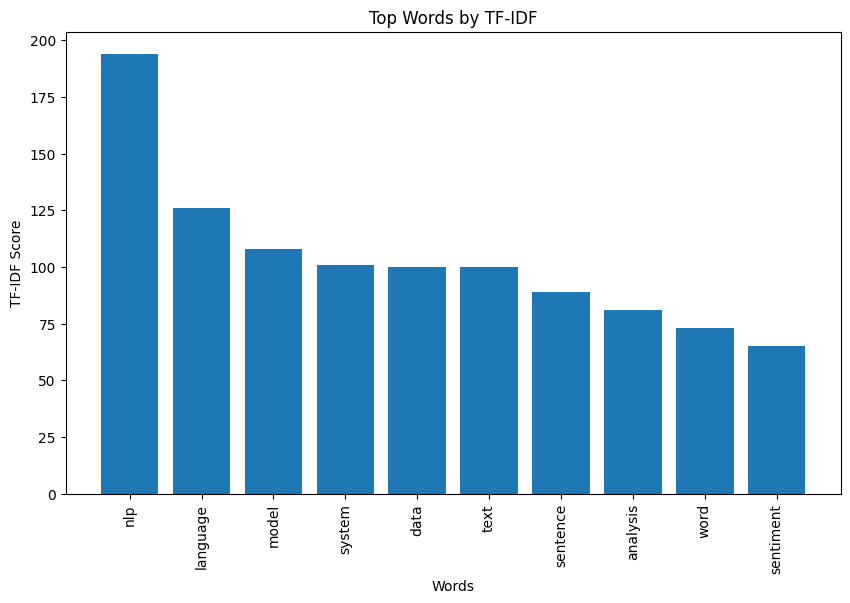

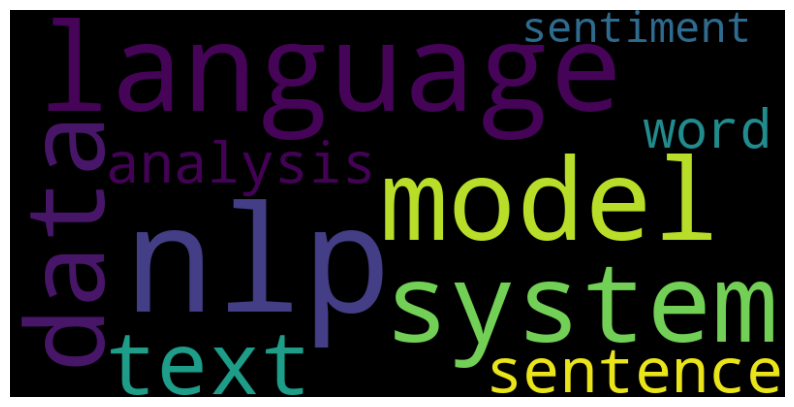

[('nlp', 194.0),
 ('language', 126.0),
 ('model', 108.0),
 ('system', 101.0),
 ('data', 100.0),
 ('text', 100.0),
 ('sentence', 89.0),
 ('analysis', 81.0),
 ('word', 73.0),
 ('sentiment', 65.0)]

In [171]:
visualizer = TopWordVisualizer(processor.get_sentences_1D())
visualizer.visualize_bar_chart()
visualizer.visualize_word_cloud()
visualizer.top_words


# Efficient Hyperparameter Optimization with Optuna

In this project, i utilized Optuna, an advanced hyperparameter optimization framework, to fine-tune multiple models including Word2Vec and Autoencoder. Our approach reflects a practical balance between model performance and computational efficiency.

## Project Context and Goals

It's important to note that the primary objective of this project is not to train extensively optimized models. Instead, our focus is on:

1. **Efficient Learning**: Achieving reasonable model performance with limited training time and resources.
2. **Practical Optimization**: Finding good hyperparameters that yield satisfactory results even with a low number of training epochs.
3. **Demonstrating Optimization Techniques**: Showcasing how Optuna can be effectively used in scenarios with computational constraints.

## Implementation Overview

I integrated Optuna into our optimization process as follows:

1. **Objective Functions**: Defined for each model type, these functions:
   - Create model instances with suggested hyperparameters.
   - Train models for a limited number of epochs.
   - Evaluate performance based on quick-to-compute metrics.

2. **Hyperparameters Optimized**:
   - For Word2Vec: Vector size, window size, learning rates, etc.
   - For Autoencoder: Hidden layer dimensions, learning rate, activation functions.

3. **Optimization Process**:
   - Optuna runs multiple trials with different hyperparameter sets.
   - Each trial involves a short training run (low number of epochs).
   - Optuna progressively suggests better hyperparameter combinations.

4. **Best Configuration Selection**:
   - The best hyperparameters are selected based on performance in these short training runs.

## Benefits of This Approach

- **Time-Efficient Optimization**: Finds good hyperparameters quickly, suitable for projects with time constraints.
- **Resource Conservation**: Optimizes model configurations without requiring extensive computational resources.
- **Practical Performance Gains**: Achieves improved model performance even with limited training, demonstrating the value of proper hyperparameter tuning.

## Application to Different Models

1. **Word2Vec Optimization**:
   - Focuses on quickly finding parameters that yield good word embeddings with minimal training.

2. **Autoencoder Optimization**:
   - Aims to discover architectures that can effectively compress and reconstruct text data in few epochs.

By applying Optuna in this manner, i demonstrate how to achieve reasonably good model configurations efficiently. This approach is particularly relevant in scenarios where extensive model training is not feasible or necessary.

In [134]:
#@title Word2VecBasic
import gensim
from gensim.models import Word2Vec
from collections import Counter
from itertools import chain

class Word2VecBasic:
    def __init__(self, corpus):
        self.corpus = corpus
        self.model = None

    def get_common_words(self, num_words=10):
        word_counts = Counter(chain.from_iterable(self.corpus))
        return [word for word, _ in word_counts.most_common(num_words)]

    def train_model(self):
        model = Word2Vec(
            sentences=self.corpus,
            vector_size=100,
            window=5,
            min_count=1,
            sg=0,
            negative=5,
            ns_exponent=0.75,
            alpha=0.025,
            min_alpha=0.0007,
            epochs=10,
            workers=4,
            seed=42
        )
        model.train(self.corpus, total_examples=len(self.corpus), epochs=10)
        self.model = model
        print("Model trained with default parameters.")

    def save_model(self, filename):
        if self.model is None:
            raise ValueError("No model to save. Train the model first.")
        self.model.save(filename)
        print(f"Model saved to {filename}")

    def load_model(self, filename):
        self.model = Word2Vec.load(filename)
        print(f"Model loaded from {filename}")

    def find_similar_words(self, word, topn=10):
        if self.model is None:
            raise ValueError("No model available. Train or load a model first.")
        if word not in self.model.wv:
            return None
        return self.model.wv.most_similar(word, topn=topn)

    def find_most_common_words(self, topn=10):
        return self.get_common_words(topn)


In [135]:
#@title Word2VecOptimizer
import gensim
import optuna
from gensim.models import Word2Vec
from optuna.trial import Trial
from collections import Counter
from itertools import chain

class Word2VecOptimizer:
    def __init__(self, corpus):
        self.corpus = corpus
        self.best_params = None
        self.best_model = None

    def get_common_words(self, num_words=10):
        word_counts = Counter(chain.from_iterable(self.corpus))
        return [word for word, _ in word_counts.most_common(num_words)]

    def optimize(self):
        def objective(trial: Trial):
            vector_size = trial.suggest_int('vector_size', 50, 300)
            window = trial.suggest_int('window', 2, 10)
            sg = trial.suggest_categorical('sg', [0, 1])
            negative = trial.suggest_int('negative', 3, 10)
            alpha = trial.suggest_float('alpha', 0.01, 0.05)
            min_alpha = trial.suggest_float('min_alpha', 0.0001, 0.005)

            model = Word2Vec(
                sentences=self.corpus,
                vector_size=vector_size,
                window=window,
                min_count=1,
                sg=sg,
                negative=negative,
                ns_exponent=0.75,
                alpha=alpha,
                min_alpha=min_alpha,
                epochs=10,
                workers=4,
                seed=42
            )
            model.train(self.corpus, total_examples=len(self.corpus), epochs=10)

            common_words = self.get_common_words()
            similarities = []
            for i in range(len(common_words)):
                for j in range(i+1, len(common_words)):
                    word1, word2 = common_words[i], common_words[j]
                    if word1 in model.wv and word2 in model.wv:
                        similarity = model.wv.similarity(word1, word2)
                        similarities.append(similarity)

            return sum(similarities) / len(similarities) if similarities else 0

        study = optuna.create_study(direction='maximize')
        study.optimize(objective, n_trials=10)

        self.best_params = study.best_params
        print("Optimization complete. Best parameters:", self.best_params)

    def train_best_model(self):
        if self.best_params is None:
            raise ValueError("Optimization hasn't been performed yet. Call optimize() first.")

        self.best_model = Word2Vec(
            sentences=self.corpus,
            vector_size=self.best_params['vector_size'],
            window=self.best_params['window'],
            min_count=1,
            sg=self.best_params['sg'],
            negative=self.best_params['negative'],
            ns_exponent=0.75,
            alpha=self.best_params['alpha'],
            min_alpha=self.best_params['min_alpha'],
            epochs=10,
            workers=4,
            seed=42
        )
        self.best_model.train(self.corpus, total_examples=len(self.corpus), epochs=10)
        print("Model trained with best parameters.")

    def save_model(self, filename):
        if self.best_model is None:
            raise ValueError("No model to save. Train the model first.")
        self.best_model.save(filename)
        print(f"Model saved to {filename}")

    def load_model(self, filename):
        self.best_model = Word2Vec.load(filename)
        print(f"Model loaded from {filename}")

    def find_similar_words(self, word, topn=10):
        if self.best_model is None:
            raise ValueError("No model available. Train or load a model first.")
        if word not in self.best_model.wv:
            return None
        return self.best_model.wv.most_similar(word, topn=topn)

    def find_most_common_words(self, topn=10):
        return self.get_common_words(topn)

In [136]:
#@title Compare Word2Vec Models


def compare_models(basic_model, optimized_model, printer):
    printer.header("Model Comparison", 'bar_chart')

    # 1. Compare most common words
    printer.subheader("Most Common Words", 'scroll')
    basic_common = basic_model.find_most_common_words(topn=10)
    optimized_common = optimized_model.find_most_common_words(topn=10)
    printer.info("Basic model:", 'pin')
    printer.info(", ".join(basic_common))
    printer.info("Optimized model:", 'pin')
    printer.info(", ".join(optimized_common))

    # 2. Compare similar words for 'NLP'
    printer.subheader("Similar Words for 'nlp'", 'magnifier')
    basic_similar = basic_model.find_similar_words('nlp', topn=5)
    optimized_similar = optimized_model.find_similar_words('nlp', topn=5)
    printer.info("Basic model:", 'pin')
    printer.info(str(basic_similar) if basic_similar else "Word 'nlp' not found in vocabulary.")
    printer.info("Optimized model:", 'pin')
    printer.info(str(optimized_similar) if optimized_similar else "Word 'nlp' not found in vocabulary.")

    # 3. Compare model parameters
    printer.subheader("Model Parameters", 'gear')
    printer.info("Basic model parameters:", 'floppy_disk')
    basic_params = {
        'vector_size': basic_model.model.vector_size,
        'window': basic_model.model.window,
        'min_count': basic_model.model.min_count,
        'sg': basic_model.model.sg,
        'hs': basic_model.model.hs,
        'negative': basic_model.model.negative,
        'ns_exponent': basic_model.model.ns_exponent,
        'alpha': basic_model.model.alpha,
        'min_alpha': basic_model.model.min_alpha
    }
    for param, value in basic_params.items():
        printer.info(f"  {param}: {value}", 'gear')

    printer.info("Optimized model parameters:", 'floppy_disk')
    for param, value in optimized_model.best_params.items():
        printer.info(f"  {param}: {value}", 'gear')

fp = FancyPrinter()

w2v_basic = Word2VecBasic(processor.get_sentences_2D())
w2v_basic.train_model()
w2v_basic.save_model("word2vecBasic.model")
w2v_basic.load_model("word2vecBasic.model")

w2v_optimized = Word2VecOptimizer(processor.get_sentences_2D())
w2v_optimized.optimize()
w2v_optimized.train_best_model()
w2v_optimized.save_model("word2vec_optimized.model")
w2v_optimized.load_model("word2vec_optimized.model")

compare_models(w2v_basic, w2v_optimized, fp)

[I 2024-08-16 14:51:59,748] A new study created in memory with name: no-name-b346ca64-f9b1-447f-945d-4d2534858c82


Model trained with default parameters.
Model saved to word2vecBasic.model
Model loaded from word2vecBasic.model


[I 2024-08-16 14:52:00,493] Trial 0 finished with value: 0.6676498519049751 and parameters: {'vector_size': 134, 'window': 7, 'sg': 0, 'negative': 5, 'alpha': 0.03538501036078027, 'min_alpha': 0.003521049996817848}. Best is trial 0 with value: 0.6676498519049751.
[I 2024-08-16 14:52:05,319] Trial 1 finished with value: 0.28399452285634147 and parameters: {'vector_size': 91, 'window': 10, 'sg': 1, 'negative': 9, 'alpha': 0.04507499470432123, 'min_alpha': 0.003917807811930643}. Best is trial 0 with value: 0.6676498519049751.
[I 2024-08-16 14:52:06,479] Trial 2 finished with value: 0.9960204972161187 and parameters: {'vector_size': 283, 'window': 5, 'sg': 0, 'negative': 6, 'alpha': 0.01981212901815583, 'min_alpha': 0.004825293430752627}. Best is trial 2 with value: 0.9960204972161187.
[I 2024-08-16 14:52:08,470] Trial 3 finished with value: 0.4127263627118535 and parameters: {'vector_size': 72, 'window': 4, 'sg': 1, 'negative': 4, 'alpha': 0.034729470560733354, 'min_alpha': 0.003271174609

Optimization complete. Best parameters: {'vector_size': 283, 'window': 5, 'sg': 0, 'negative': 6, 'alpha': 0.01981212901815583, 'min_alpha': 0.004825293430752627}


Model trained with best parameters.
Model saved to word2vec_optimized.model
Model loaded from word2vec_optimized.model

📊 Model Comparison

📜 Most Common Words
📌 Basic model:
💡 nlp, language, model, system, text, data, sentence, analysis, word, sentiment
📌 Optimized model:
💡 nlp, language, model, system, text, data, sentence, analysis, word, sentiment

🔍 Similar Words for 'nlp'
📌 Basic model:
💡 [('system', 0.9975259900093079), ('data', 0.9972060918807983), ('bias', 0.996476411819458), ('model', 0.9963741898536682), ('effectively', 0.995954692363739)]
📌 Optimized model:
💡 [('system', 0.999387800693512), ('data', 0.9990140199661255), ('process', 0.9988237023353577), ('bias', 0.9987782835960388), ('capability', 0.9987516403198242)]

⚙️ Model Parameters
💾 Basic model parameters:
⚙️   vector_size: 100
⚙️   window: 5
⚙️   min_count: 1
⚙️   sg: 0
⚙️   hs: 0
⚙️   negative: 5
⚙️   ns_exponent: 0.75
⚙️   alpha: 0.025
⚙️   min_alpha: 0.0007
💾 Optimized model parameters:
⚙️   vector_size: 283
⚙️  

In [137]:
#@title Autoencoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import optuna
import numpy as np

class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim),
            nn.ReLU(True)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def encode(self, x):
        return self.encoder(x)

    def decode(self, x):
        return self.decoder(x)


In [138]:
#@title AutoencoderBasic
class AutoencoderBasic:
    def __init__(self, corpus, hidden_dim=10, learning_rate=0.001):
        self.corpus = self.prepare_corpus(corpus)
        self.vectorizer = CountVectorizer()
        self.scaler = StandardScaler()
        self.data = None
        self.model = None
        self.dataloader = None
        self.hidden_dim = hidden_dim
        self.learning_rate = learning_rate

    def prepare_corpus(self, corpus):
        if isinstance(corpus[0], list):
            return [' '.join(sentence) for sentence in corpus]
        elif isinstance(corpus[0], str):
            return corpus
        else:
            raise ValueError("Corpus must be a list of lists (tokenized sentences) or a list of strings (untokenized sentences)")

    def preprocess_data(self):
        bow_matrix = self.vectorizer.fit_transform(self.corpus)
        self.data = self.scaler.fit_transform(bow_matrix.toarray())
        tensor_data = torch.FloatTensor(self.data)
        dataset = TensorDataset(tensor_data)
        self.dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
        return self.data, self.dataloader

    def train_model(self, num_epochs=10):
        self.preprocess_data()
        input_dim = self.data.shape[1]
        self.model = Autoencoder(input_dim, self.hidden_dim)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)

        for epoch in range(num_epochs):
            for batch in self.dataloader:
                inputs = batch[0]
                outputs = self.model(inputs)
                loss = criterion(outputs, inputs)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        print("Basic model trained. Final loss:", loss.item())
        return self.model, loss.item()


In [139]:
#@title AutoencoderOptimizer

class AutoencoderOptimizer:
    def __init__(self, corpus):
        self.corpus = self.prepare_corpus(corpus)
        self.vectorizer = CountVectorizer()
        self.scaler = StandardScaler()
        self.data = None
        self.best_params = None
        self.best_model = None
        self.dataloader = None

    def prepare_corpus(self, corpus):
        if isinstance(corpus[0], list):
            return [' '.join(sentence) for sentence in corpus]
        elif isinstance(corpus[0], str):
            return corpus
        else:
            raise ValueError("Corpus must be a list of lists (tokenized sentences) or a list of strings (untokenized sentences)")

    def preprocess_data(self):
        bow_matrix = self.vectorizer.fit_transform(self.corpus)
        self.data = self.scaler.fit_transform(bow_matrix.toarray())
        tensor_data = torch.FloatTensor(self.data)
        dataset = TensorDataset(tensor_data)
        self.dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
        return self.data, self.dataloader

    def objective(self, trial):
        input_dim = self.data.shape[1]
        hidden_dim = trial.suggest_int('hidden_dim', 5, 15)
        learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)

        model = Autoencoder(input_dim, hidden_dim)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        num_epochs = 1
        for epoch in range(num_epochs):
            for batch in self.dataloader:
                inputs = batch[0]
                outputs = model(inputs)
                loss = criterion(outputs, inputs)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return loss.item()

    def optimize(self, n_trials=50):
        self.preprocess_data()
        study = optuna.create_study(direction='minimize')
        study.optimize(self.objective, n_trials=n_trials)

        self.best_params = study.best_params
        print("Optimization complete. Best parameters:", self.best_params)
        return self.best_params

    def train_best_model(self, num_epochs=10):
        if self.best_params is None:
            raise ValueError("Optimization hasn't been performed yet. Call optimize() first.")

        input_dim = self.data.shape[1]
        hidden_dim = self.best_params['hidden_dim']
        learning_rate = self.best_params['learning_rate']

        self.best_model = Autoencoder(input_dim, hidden_dim)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.best_model.parameters(), lr=learning_rate)

        for epoch in range(num_epochs):
            for batch in self.dataloader:
                inputs = batch[0]
                outputs = self.best_model(inputs)
                loss = criterion(outputs, inputs)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        print("Optimized model trained. Final loss:", loss.item())
        return self.best_model, loss.item()

    def get_vector_representation(self):
        if self.best_model is None:
            raise ValueError("No model trained. Call train_best_model() first.")

        # Pass the data through the encoder to get vector representations
        encoded_data = []
        for batch in self.dataloader:
            inputs = batch[0]
            encoded_batch = self.best_model.encode(inputs).detach().numpy()
            encoded_data.extend(encoded_batch)

        return encoded_data
    def get_common_words(self, num_words=10):
        word_counts = Counter(chain.from_iterable(sentence.split() for sentence in self.corpus))
        return [word for word, _ in word_counts.most_common(num_words)]


In [140]:
#@title Compare Autoencoders Models
import numpy as np
from collections import Counter
import random


def create_random_test_sentences(corpus, num_sentences=5, words_per_sentence=5):
    all_words = [word for sentence in corpus for word in sentence]
    random_sentences = []
    for _ in range(num_sentences):
        random_sentence = ' '.join(random.choices(all_words, k=words_per_sentence))
        random_sentences.append(random_sentence)
    return random_sentences

def compare_autoencoders(basic_autoencoder, optimized_autoencoder, corpus, top_n=10):
    fp.header("Autoencoder Comparison", 'robot')

    # Create random test sentences
    test_sentences = create_random_test_sentences(corpus)
    fp.subheader("Random Test Sentences", 'scroll')
    for sentence in test_sentences:
        fp.info(f"  {sentence}", 'pin')

    # Compare model parameters
    fp.subheader("1. Model Parameters", 'gear')
    fp.info("Basic model:", 'floppy_disk')
    fp.info(f"  Hidden dimension: {basic_autoencoder.hidden_dim}", 'light_bulb')
    fp.info(f"  Learning rate: {basic_autoencoder.learning_rate}", 'light_bulb')
    fp.info("Optimized model:", 'floppy_disk')
    fp.info(f"  Hidden dimension: {optimized_autoencoder.best_params['hidden_dim']}", 'light_bulb')
    fp.info(f"  Learning rate: {optimized_autoencoder.best_params['learning_rate']}", 'light_bulb')

    # Compare reconstruction loss
    fp.subheader("2. Reconstruction Loss", 'bar_chart')
    basic_model, basic_loss = basic_autoencoder.train_model()
    optimized_model, optimized_loss = optimized_autoencoder.train_best_model()
    fp.info(f"Basic model loss: {basic_loss:.6f}", 'fire')
    fp.info(f"Optimized model loss: {optimized_loss:.6f}", 'fire')

    # Compare reconstruction quality
    fp.subheader("3. Reconstruction Quality", 'magnifier')
    test_bow = basic_autoencoder.vectorizer.transform(test_sentences)
    test_scaled = basic_autoencoder.scaler.transform(test_bow.toarray())
    test_tensor = torch.FloatTensor(test_scaled)

    with torch.no_grad():
        basic_reconstructed = basic_model(test_tensor).numpy()
        optimized_reconstructed = optimized_model(test_tensor).numpy()

    basic_reconstructed = basic_autoencoder.scaler.inverse_transform(basic_reconstructed)
    optimized_reconstructed = optimized_autoencoder.scaler.inverse_transform(optimized_reconstructed)

    for i, sentence in enumerate(test_sentences):
        fp.info(f"\nOriginal: {sentence}", 'scroll')
        fp.info("Basic reconstruction:", 'robot')
        fp.info(" ".join(basic_autoencoder.vectorizer.get_feature_names_out()[np.argsort(basic_reconstructed[i])[-5:]]), 'light_bulb')
        fp.info("Optimized reconstruction:", 'robot')
        fp.info(" ".join(optimized_autoencoder.vectorizer.get_feature_names_out()[np.argsort(optimized_reconstructed[i])[-5:]]), 'light_bulb')

    # Compare most common words
    fp.subheader(f"4. Top {top_n} Most Common Words", 'book')

    # For basic model
    basic_word_counts = Counter()
    for sentence in basic_autoencoder.corpus:
        basic_word_counts.update(sentence.split())

    fp.info("Basic model:", 'robot')
    for word, count in basic_word_counts.most_common(top_n):
        fp.info(f"  {word}: {count}", 'pin')

    # For optimized model
    optimized_word_counts = Counter()
    for sentence in optimized_autoencoder.corpus:
        optimized_word_counts.update(sentence.split())

    fp.info("\nOptimized model:", 'robot')
    for word, count in optimized_word_counts.most_common(top_n):
        fp.info(f"  {word}: {count}", 'pin')

    # Compare vocabulary sizes
    fp.subheader("5. Vocabulary Size", 'book')
    basic_vocab_size = len(basic_autoencoder.vectorizer.get_feature_names_out())
    optimized_vocab_size = len(optimized_autoencoder.vectorizer.get_feature_names_out())
    fp.info(f"Basic model vocabulary size: {basic_vocab_size}", 'light_bulb')
    fp.info(f"Optimized model vocabulary size: {optimized_vocab_size}", 'light_bulb')



fp = FancyPrinter()
basic_autoencoder = AutoencoderBasic(processor.get_sentences_2D())
basic_autoencoder.train_model()

fp.header("Optimizing Autoencoder", 'gear')
optimized_autoencoder = AutoencoderOptimizer(processor.get_sentences_2D())
_ = optimized_autoencoder.optimize(n_trials=50)
optimized_autoencoder.train_best_model()

# # Compare the models
compare_autoencoders(basic_autoencoder, optimized_autoencoder, processor.get_sentences_2D())

Basic model trained. Final loss: 0.6782797574996948

⚙️ Optimizing Autoencoder


[I 2024-08-16 14:52:36,044] A new study created in memory with name: no-name-2e46b96f-0221-4344-a59c-48b3535cbc32
<ipython-input-139-9743c2d61f94>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-08-16 14:52:36,306] Trial 0 finished with value: 0.7635779976844788 and parameters: {'hidden_dim': 8, 'learning_rate': 0.001175103417272001}. Best is trial 0 with value: 0.7635779976844788.
[I 2024-08-16 14:52:36,767] Trial 1 finished with value: 0.8727605938911438 and parameters: {'hidden_dim': 14, 'learning_rate': 0.004959562292755813}. Best is trial 0 with value: 0.7635779976844788.
[I 2024-08-16 14:52:37,269] Trial 2 finished with value: 0.582673966884613 and parameters: {'hidden_dim': 14, 'learning_rate': 0.007785587552871523}. Best is trial 2 with valu

Optimization complete. Best parameters: {'hidden_dim': 9, 'learning_rate': 0.005880050553793864}
Optimized model trained. Final loss: 0.6197946667671204

🤖 Autoencoder Comparison

📜 Random Test Sentences
📌   summary revealing correlate crucially part
📌   received sentence analysis significantly nlp
📌   improving contains site four publicized
📌   grasping paper saccade logic coordinate
📌   language conveys model model frequently

⚙️ 1. Model Parameters
💾 Basic model:
💡   Hidden dimension: 10
💡   Learning rate: 0.001
💾 Optimized model:
💡   Hidden dimension: 9
💡   Learning rate: 0.005880050553793864

📊 2. Reconstruction Loss
Basic model trained. Final loss: 1.159171462059021
Optimized model trained. Final loss: 0.6948021054267883
🔥 Basic model loss: 1.159171
🔥 Optimized model loss: 0.694802

🔍 3. Reconstruction Quality
📜 
Original: summary revealing correlate crucially part
🤖 Basic reconstruction:
💡 system data model language nlp
🤖 Optimized reconstruction:
💡 key versatile language data n

Both models consistently reconstruct the same top 5 words ("data", "system", "language", "model", "nlp") for all test sentences, suggesting a potential issue with the models' ability to capture diverse representations.


This could be due to "nlp" being highly prevalent in the training data, or the models overfitting to common terms.


On the other hand, I loaded articles with NLP topics, so it makes sense; it might reflect the nature of the dataset if it's heavily focused on NLP topics.


📊 Enhanced NLP Models Comparison

📚 1. Top Words Comparison
🔍 TF-IDF Top Words:
📌 nlp, language, model, system, data, text, sentence, analysis, word, sentiment
🔍 Word2Vec Top Words:
📌 nlp, language, model, system, text, data, sentence, analysis, word, sentiment
🔍 Autoencoder Top Words:
📌 nlp, language, model, system, text, data, sentence, analysis, word, sentiment

🔍 2. Word Overlap Analysis
💡 TF-IDF & Word2Vec overlap: 10 words
📌 Overlapping words: sentence, language, data, word, text, model, system, nlp, analysis, sentiment
💡 TF-IDF & Autoencoder overlap: 10 words
📌 Overlapping words: sentence, language, data, word, text, model, system, nlp, analysis, sentiment
💡 Word2Vec & Autoencoder overlap: 10 words
📌 Overlapping words: sentence, language, data, word, text, model, system, nlp, analysis, sentiment
⭐ Words common to all models: 10
📌 Common words: sentence, language, data, word, text, model, system, nlp, analysis, sentiment

chart_with_upwards_trend 3. Word Importance Visualization

<ipython-input-151-b7eb4c979b0d>:97: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(min_length), tfidf_scores, 'r-', label='TF-IDF', marker='o', linestyle='-')
<ipython-input-151-b7eb4c979b0d>:98: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(range(min_length), w2v_scores, 'b--', label='Word2Vec', marker='x', linestyle='--')
<ipython-input-151-b7eb4c979b0d>:99: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-." (-> linestyle='-.'). The keyword argument will take precedence.
  plt.plot(range(min_length), ae_scores, 'g-.', label='Autoencoder', marker='s', linestyle='-.')


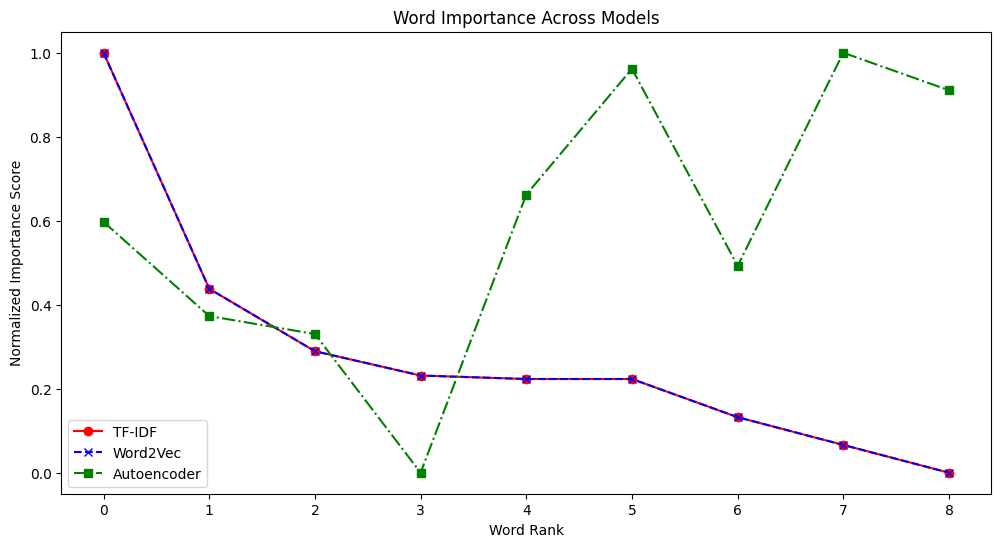


cloud 4. Word Cloud Comparison


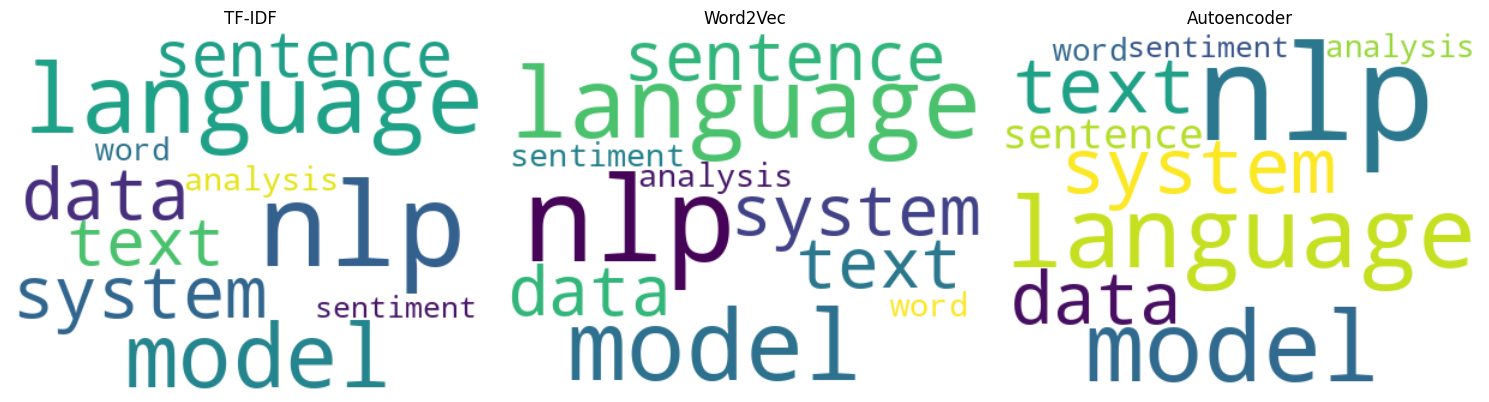


twisted_rightwards_arrows 5. Model Similarity Analysis


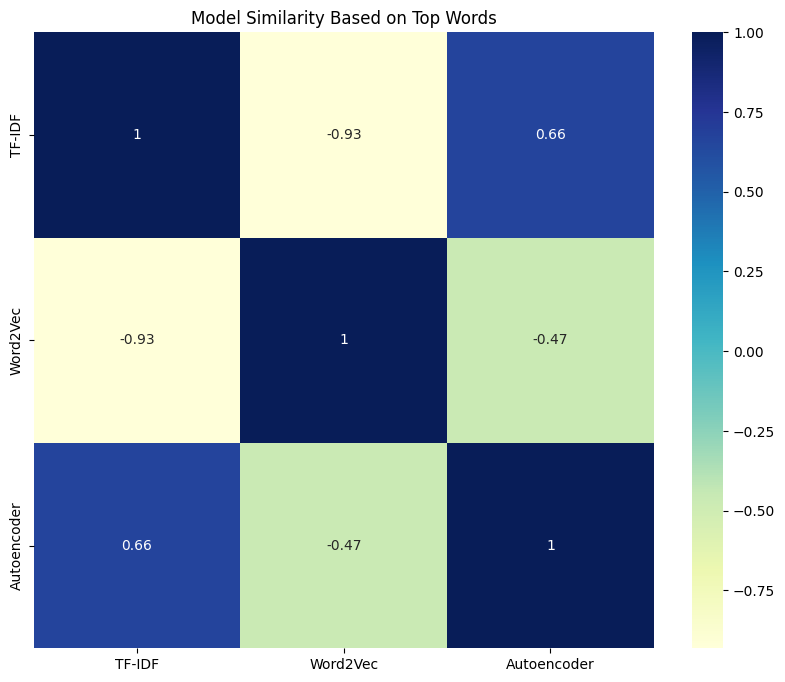

✅ Enhanced NLP Models Comparison Completed


In [151]:
#@title Comparing TF-IDF , word2vec and AutoEncoder results for finding the most common words

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from collections import Counter

import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
# from collections import Counter
from itertools import chain
def compare_nlp_models(tfidf_visualizer, word2vec_model, autoencoder_model, fp, num_words=10):
    fp.header("Enhanced NLP Models Comparison", 'bar_chart')

    # 1. Compare top words
    fp.subheader("1. Top Words Comparison", 'book')
    top_words = compare_top_words(tfidf_visualizer, word2vec_model, autoencoder_model, num_words, fp)

    # 2. Word overlap analysis
    fp.subheader("2. Word Overlap Analysis", 'magnifier')
    overlap_analysis(top_words, fp)

    # 3. Word importance visualization
    fp.subheader("3. Word Importance Visualization", 'chart_with_upwards_trend')
    plot_word_importance(tfidf_visualizer, word2vec_model, autoencoder_model, num_words)

    # 4. Word Cloud Comparison
    fp.subheader("4. Word Cloud Comparison", 'cloud')
    plot_word_clouds(tfidf_visualizer, word2vec_model, autoencoder_model, num_words)

     # 5. Model Similarity Analysis
    fp.subheader("5. Model Similarity Analysis", 'twisted_rightwards_arrows')
    plot_model_similarity(tfidf_visualizer, word2vec_model, autoencoder_model, num_words)

    fp.success("Enhanced NLP Models Comparison Completed")

def get_top_words_tfidf(tfidf_visualizer, num_words):
    return [word for word, _ in tfidf_visualizer.top_words[:num_words]]

def compare_top_words(tfidf_visualizer, word2vec_model, autoencoder_model, num_words, fp):
    tfidf_top_words = get_top_words_tfidf(tfidf_visualizer, num_words)
    w2v_top_words = word2vec_model.find_most_common_words(num_words)
    ae_top_words = autoencoder_model.get_common_words(num_words)

    fp.info("TF-IDF Top Words:", 'magnifier')
    fp.info(", ".join(tfidf_top_words), 'pin')
    fp.info("Word2Vec Top Words:", 'magnifier')
    fp.info(", ".join(w2v_top_words), 'pin')
    fp.info("Autoencoder Top Words:", 'magnifier')
    fp.info(", ".join(ae_top_words), 'pin')

    return {
        'TF-IDF': set(tfidf_top_words),
        'Word2Vec': set(w2v_top_words),
        'Autoencoder': set(ae_top_words)
    }

def overlap_analysis(top_words, fp):
    model_pairs = [('TF-IDF', 'Word2Vec'), ('TF-IDF', 'Autoencoder'), ('Word2Vec', 'Autoencoder')]

    for model1, model2 in model_pairs:
        overlap = top_words[model1] & top_words[model2]
        fp.info(f"{model1} & {model2} overlap: {len(overlap)} words", 'light_bulb')
        fp.info(f"Overlapping words: {', '.join(overlap)}", 'pin')

    all_models_overlap = top_words['TF-IDF'] & top_words['Word2Vec'] & top_words['Autoencoder']
    fp.info(f"Words common to all models: {len(all_models_overlap)}", 'star')
    fp.info(f"Common words: {', '.join(all_models_overlap)}", 'pin')
def plot_word_importance(tfidf_visualizer, word2vec_model, autoencoder_model, num_words):
    tfidf_scores = [score for _, score in tfidf_visualizer.top_words[:num_words]]
    w2v_scores = [word2vec_model.best_model.wv.get_vecattr(word, 'count') for word in word2vec_model.find_most_common_words(num_words)]

    ae_vectors = autoencoder_model.get_vector_representation()
    if isinstance(ae_vectors, list) and len(ae_vectors) > 0 and isinstance(ae_vectors[0], np.ndarray):
        ae_scores = np.mean(ae_vectors, axis=0)[:num_words]
    else:
        ae_scores = ae_vectors[:num_words]

    # Ensure all score lists have the same length
    min_length = min(len(tfidf_scores), len(w2v_scores), len(ae_scores))
    tfidf_scores = tfidf_scores[:min_length]
    w2v_scores = w2v_scores[:min_length]
    ae_scores = ae_scores[:min_length]

    # Normalize scores
    def normalize_scores(scores):
        if np.max(scores) - np.min(scores) == 0:
            return scores
        return (scores - np.min(scores)) / (np.max(scores) - np.min(scores))

    tfidf_scores = normalize_scores(tfidf_scores)
    w2v_scores = normalize_scores(w2v_scores)
    ae_scores = normalize_scores(ae_scores)

    plt.figure(figsize=(12, 6))
    plt.plot(range(min_length), tfidf_scores, 'r-', label='TF-IDF', marker='o', linestyle='-')
    plt.plot(range(min_length), w2v_scores, 'b--', label='Word2Vec', marker='x', linestyle='--')
    plt.plot(range(min_length), ae_scores, 'g-.', label='Autoencoder', marker='s', linestyle='-.')
    plt.xlabel('Word Rank')
    plt.ylabel('Normalized Importance Score')
    plt.title('Word Importance Across Models')
    plt.legend()
    plt.show()

def plot_word_importance1(tfidf_visualizer, word2vec_model, autoencoder_model, num_words):
    tfidf_scores = [score for _, score in tfidf_visualizer.top_words[:num_words]]
    w2v_scores = [word2vec_model.best_model.wv.get_vecattr(word, 'count') for word in word2vec_model.find_most_common_words(num_words)]

    # Handle multiple vectors from autoencoder
    ae_vectors = autoencoder_model.get_vector_representation()
    if isinstance(ae_vectors, list) and len(ae_vectors) > 0 and isinstance(ae_vectors[0], np.ndarray):
        # If we have multiple vectors, take the average
        ae_scores = np.mean(ae_vectors, axis=0)[:num_words]
    else:
        # If it's already a single vector, use it directly
        ae_scores = ae_vectors[:num_words]

    # Ensure all score lists have the same length
    min_length = min(len(tfidf_scores), len(w2v_scores), len(ae_scores))
    tfidf_scores = tfidf_scores[:min_length]
    w2v_scores = w2v_scores[:min_length]
    ae_scores = ae_scores[:min_length]

    # Normalize scores
    tfidf_scores = (tfidf_scores - np.min(tfidf_scores)) / (np.max(tfidf_scores) - np.min(tfidf_scores))
    w2v_scores = (w2v_scores - np.min(w2v_scores)) / (np.max(w2v_scores) - np.min(w2v_scores))
    ae_scores = (ae_scores - np.min(ae_scores)) / (np.max(ae_scores) - np.min(ae_scores))

    plt.figure(figsize=(12, 6))
    plt.plot(range(min_length), tfidf_scores, 'r-', label='TF-IDF')
    plt.plot(range(min_length), w2v_scores, 'b-', label='Word2Vec')
    plt.plot(range(min_length), ae_scores, 'g-', label='Autoencoder')
    plt.xlabel('Word Rank')
    plt.ylabel('Normalized Importance Score')
    plt.title('Word Importance Across Models')
    plt.legend()
    plt.show()

def plot_model_similarity(tfidf_visualizer, word2vec_model, autoencoder_model, num_words):
    # Get top words and their vectors for each model
    tfidf_words, tfidf_scores = zip(*tfidf_visualizer.top_words[:num_words])
    w2v_words = word2vec_model.find_most_common_words(num_words)
    w2v_vectors = [word2vec_model.best_model.wv[word] for word in w2v_words]
    ae_words = autoencoder_model.get_common_words(num_words)
    ae_vectors = autoencoder_model.get_vector_representation()[:num_words]

    # Create word-vector dictionaries
    tfidf_dict = dict(zip(tfidf_words, tfidf_scores))
    w2v_dict = dict(zip(w2v_words, w2v_vectors))
    ae_dict = dict(zip(ae_words, ae_vectors))

    # Get union of all words
    all_words = set(tfidf_words) | set(w2v_words) | set(ae_words)

    # Create vectors for each model using the union of words
    tfidf_vector = [tfidf_dict.get(word, 0) for word in all_words]
    w2v_vector = [np.mean(w2v_dict.get(word, np.zeros(w2v_vectors[0].shape))) for word in all_words]
    ae_vector = [np.mean(ae_dict.get(word, np.zeros(ae_vectors[0].shape))) for word in all_words]

    # Calculate cosine similarity
    similarity_matrix = cosine_similarity([tfidf_vector, w2v_vector, ae_vector])

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, annot=True, cmap='YlGnBu', xticklabels=['TF-IDF', 'Word2Vec', 'Autoencoder'], yticklabels=['TF-IDF', 'Word2Vec', 'Autoencoder'])
    plt.title('Model Similarity Based on Top Words')
    plt.show()

def plot_word_clouds(tfidf_visualizer, word2vec_model, autoencoder_model, num_words):
    # Prepare word frequencies for each model
    tfidf_freq = dict(tfidf_visualizer.top_words[:num_words])
    w2v_freq = Counter(word2vec_model.find_most_common_words(num_words))
    ae_freq = Counter(autoencoder_model.get_common_words(num_words))

    # Create word clouds
    wc_tfidf = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(tfidf_freq)
    wc_w2v = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(w2v_freq)
    wc_ae = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(ae_freq)

    # Plot word clouds
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.imshow(wc_tfidf, interpolation='bilinear')
    ax1.axis('off')
    ax1.set_title('TF-IDF')
    ax2.imshow(wc_w2v, interpolation='bilinear')
    ax2.axis('off')
    ax2.set_title('Word2Vec')
    ax3.imshow(wc_ae, interpolation='bilinear')
    ax3.axis('off')
    ax3.set_title('Autoencoder')
    plt.tight_layout()
    plt.show()


# Call the main function
compare_nlp_models(visualizer, w2v_optimized, optimized_autoencoder, fp)


🤖 Performing Named Entity Recognition
✅ NER completed on 2027 texts

🤖 Summary Statistics

📌 Entity Counts
💡 DATE: 167
💡 PERSON: 181
💡 CARDINAL: 492
💡 NORP: 52
💡 GPE: 85
💡 ORG: 280
💡 ORDINAL: 22
💡 LAW: 20
💡 TIME: 11
💡 PRODUCT: 9
💡 QUANTITY: 16
💡 MONEY: 4
💡 PERCENT: 19
💡 WORK_OF_ART: 2
💡 LANGUAGE: 7
💡 FAC: 1
💡 LOC: 1

📌 Most Common Entities
💡 CARDINAL: 492
💡 ORG: 280
💡 PERSON: 181
💡 DATE: 167
💡 GPE: 85
💡 NORP: 52
💡 ORDINAL: 22
💡 LAW: 20
💡 PERCENT: 19
💡 QUANTITY: 16

🤖 Exploratory Data Analysis

📌 Basic Statistics
💡              Start          End
count  1369.000000  1369.000000
mean     41.914536    47.174580
std      67.573866    67.974213
min       0.000000     1.000000
25%       0.000000     7.000000
50%      19.000000    23.000000
75%      60.000000    63.000000
max     602.000000   612.000000

📌 Entity Distribution


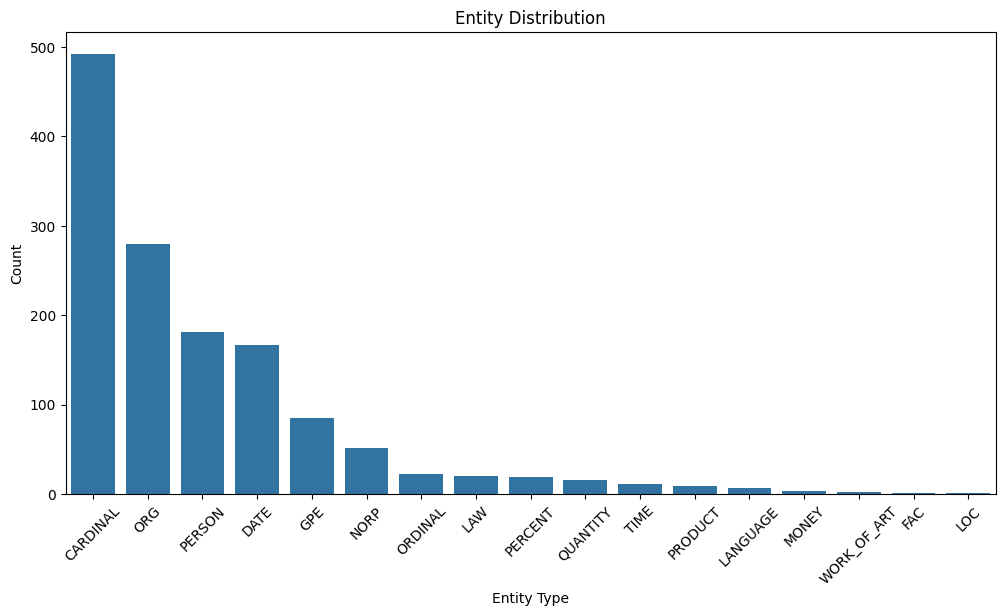


📌 Top 10 Entities


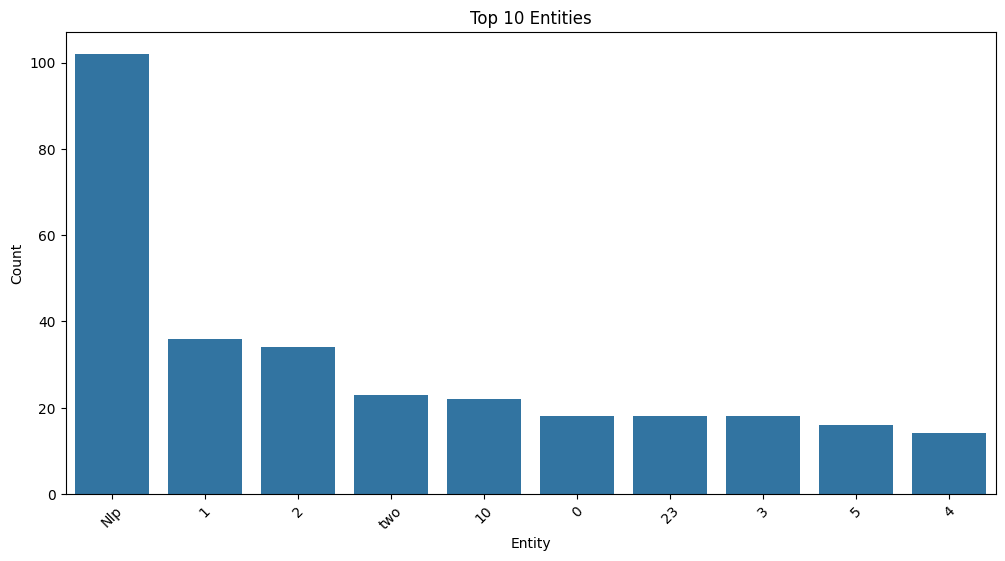


📌 Top 5 Contexts for Each Entity
⭐ Entity: Nlp
📜 Context 1: Nlp powers sentiment analysis in stock trading, financial transaction fraud detection, and automated customer service via chatbots.
📜 Context 2: Nlp enhances e-commerce through chatbots and virtual assistants, improving product search with semantic capabilities and analyzing customer review sentiment to improve products and services.
📜 Context 3: Nlp systems must accurately parse syntax and semantics to generate coherent, context-appropriate responses.
📜 Context 4: Nlp will further transform industries by automating complex tasks, enhancing decision-making, and improving human-computer interaction.
📜 Context 5: Nlp bridges crucially between.
⭐ Entity: 1
📜 Context 1: We achieved the best values in our setting on 5 datasets , and 1 .
📜 Context 2: Table 1: archetype - research questions.
📜 Context 3: Figure 1.
📜 Context 4: The semantics are given in [1].
📜 Context 5: To identify the metal, anomalous diffraction data were collect

In [155]:
#@title Named Entity Recognition (NER) with EDA

import spacy
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
class NERPerformer:
    def __init__(self, texts):
        self.texts = texts
        self.nlp = spacy.load("en_core_web_sm")
        self.entity_counts = Counter()
        self.entity_details = []
        self.printer = FancyPrinter()

    def perform_ner(self, sample_size=100):
        self.printer.header("Performing Named Entity Recognition")
        for text in self.texts[:sample_size]:
            doc = self.nlp(text)
            for ent in doc.ents:
                self.entity_counts[ent.label_] += 1
                self.entity_details.append((ent.text, ent.label_, ent.start_char, ent.end_char, text))
        self.printer.success(f"NER completed on {min(sample_size, len(self.texts))} texts")

    def show_summary_statistics(self):
        self.printer.header("Summary Statistics")

        self.printer.subheader("Entity Counts")
        for label, count in self.entity_counts.items():
            self.printer.info(f"{label}: {count}")

        self.printer.subheader("Most Common Entities")
        most_common_entities = self.entity_counts.most_common(10)
        for entity, count in most_common_entities:
            self.printer.info(f"{entity}: {count}")

    def generate_eda(self):
        self.printer.header("Exploratory Data Analysis")

        df = pd.DataFrame(self.entity_details, columns=['Entity', 'Label', 'Start', 'End', 'Context'])

        self.printer.subheader("Basic Statistics")
        self.printer.info(str(df.describe()))

        self.printer.subheader("Entity Distribution")
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x='Label', order=df['Label'].value_counts().index)
        plt.title('Entity Distribution')
        plt.xlabel('Entity Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

        self.printer.subheader("Top 10 Entities")
        top_entities = df['Entity'].value_counts().head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=top_entities.index, y=top_entities.values)
        plt.title('Top 10 Entities')
        plt.xlabel('Entity')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

        self.printer.subheader("Top 5 Contexts for Each Entity")
        for entity in df['Entity'].value_counts().head(5).index:
            contexts = df[df['Entity'] == entity]['Context']
            sample_size = min(5, len(contexts))
            context_samples = contexts.sample(sample_size, random_state=1).values
            self.printer.info(f"Entity: {entity}", emoji='star')
            for i, context in enumerate(context_samples, 1):
                self.printer.info(f"Context {i}: {context}", emoji='scroll')
            self.printer.print_separator()

# Instantiate the NERPerformer class
ner_performer = NERPerformer(processor.get_sentences())

# Perform NER
ner_performer.perform_ner(sample_size=len(processor.get_sentences()))

# Show summary statistics
ner_performer.show_summary_statistics()

# Generate EDA
ner_performer.generate_eda()


chart_with_upwards_trend Comprehensive Word Trend Analysis and Interdependence

🔍 1. Most Common Words/Concepts
📚 Top 20 words: nlp, text, language, data, sentiment, sentence, analysis, systems, speech, model, al, human, customer, et, learning, content, models, using, computer, information

chart_with_upwards_trend 2. Word Trends Over Years
wastebasket Words excluded due to zero frequency: set()
chart_with_upwards_trend Plotting nlp: [21, 9, 0, 4, 5, 18, 16, 3, 0, 0, 0, 21, 0, 0, 5, 0, 0, 4, 0, 0, 0, 0, 15, 9, 49]
chart_with_upwards_trend Plotting text: [7, 2, 0, 3, 1, 7, 1, 0, 0, 0, 0, 8, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 6, 0, 18]
chart_with_upwards_trend Plotting language: [6, 3, 0, 4, 3, 14, 18, 6, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 9, 3, 24]
chart_with_upwards_trend Plotting data: [9, 5, 0, 0, 2, 7, 5, 1, 0, 0, 0, 5, 0, 0, 8, 0, 0, 2, 0, 0, 0, 0, 10, 0, 24]
chart_with_upwards_trend Plotting sentiment: [6, 3, 0, 4, 0, 2, 1, 0, 0, 0, 0, 11, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 8, 1, 16

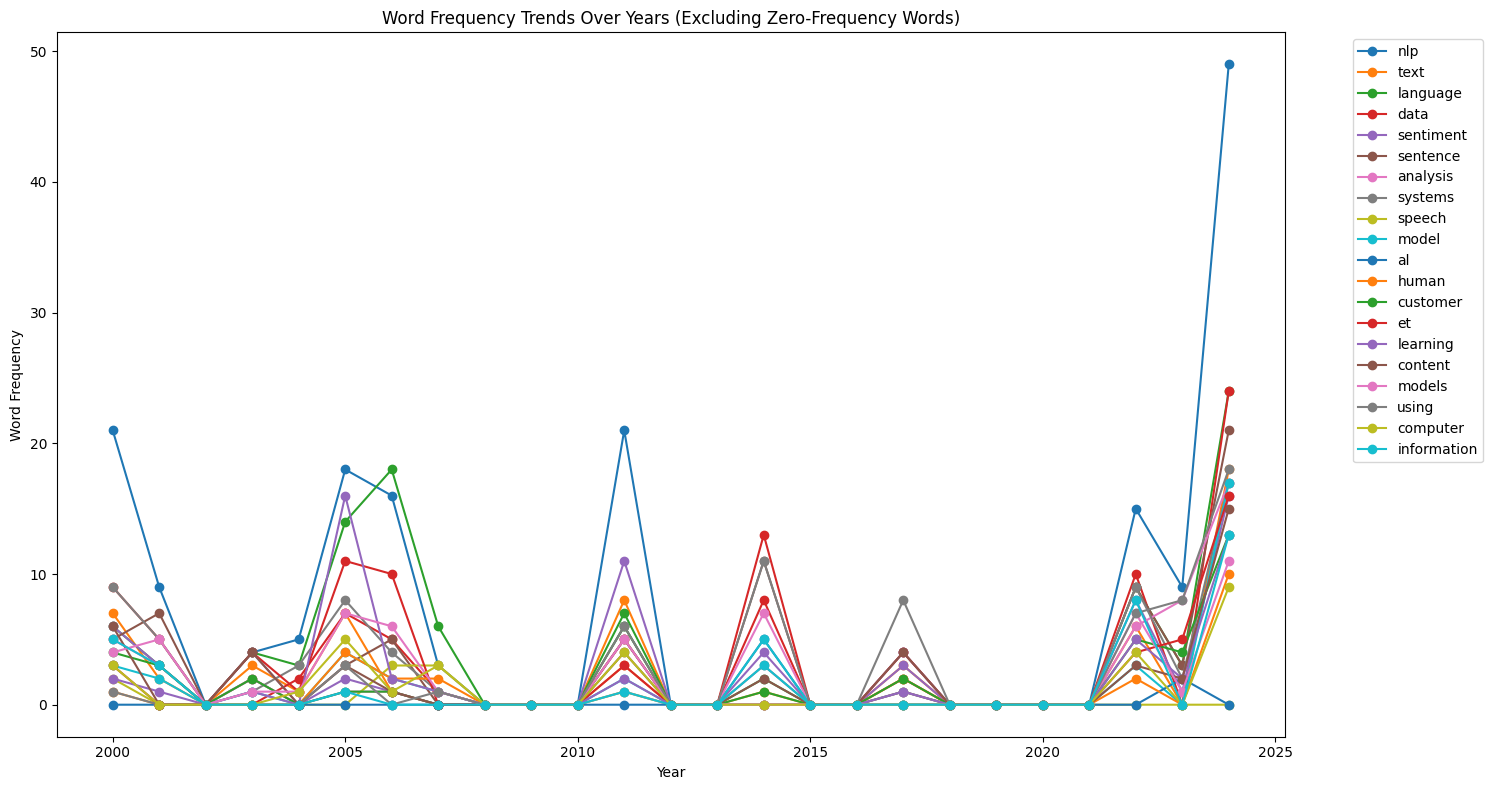


twisted_rightwards_arrows 3. Interdependent Words/Concepts
💡 Top interdependent word pairs:
link nlp - systems: Correlation = 0.96
link data - systems: Correlation = 0.96
link data - model: Correlation = 0.95
link sentiment - customer: Correlation = 0.95
link text - content: Correlation = 0.95


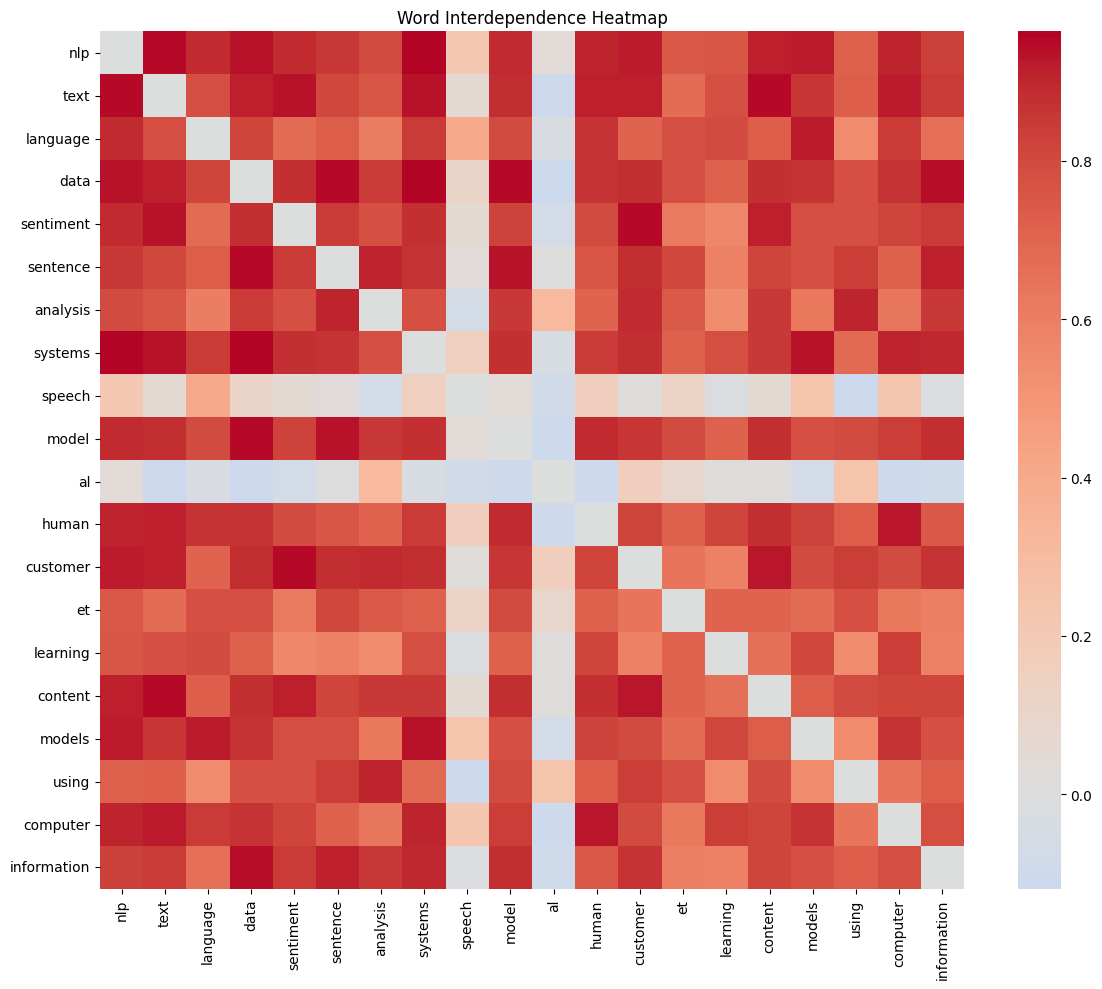

✅ Comprehensive Word Trend Analysis Completed


In [191]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings

def analyze_word_trends(df, fp, top_n=20):
    fp.header("Comprehensive Word Trend Analysis and Interdependence", 'chart_with_upwards_trend')

    # Ensure 'year' column exists and is in the correct format
    if 'year' not in df.columns:
        fp.error("Error: 'year' column not found in the dataframe.")
        return

    df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
    start_year = df['year'].min()
    end_year = df['year'].max()

    # 1. Find most common words using TF-IDF
    fp.subheader("1. Most Common Words/Concepts", 'magnifier')
    tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = tfidf.fit_transform(df['extracted_content'])
    feature_names = tfidf.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    top_words = [feature_names[i] for i in tfidf_scores.argsort()[::-1][:top_n]]

    fp.info(f"Top {top_n} words: {', '.join(top_words)}", 'book')

    # 2. Analyze trends for top words
    fp.subheader("2. Word Trends Over Years", 'chart_with_upwards_trend')
    word_trends = analyze_word_trends_over_years(df, top_words, start_year, end_year)

    # Filter out words with zero frequency across all years
    non_zero_words = {word: counts for word, counts in word_trends.items() if sum(counts) > 0}

    fp.info(f"Words excluded due to zero frequency: {set(word_trends.keys()) - set(non_zero_words.keys())}", 'wastebasket')
    plot_word_trends(non_zero_words, start_year, end_year, fp)

    # 3. Find interdependent words/concepts
    fp.subheader("3. Interdependent Words/Concepts", 'twisted_rightwards_arrows')
    correlation_matrix = calculate_word_correlations(non_zero_words)
    interdependent_pairs = find_interdependent_pairs(correlation_matrix, list(non_zero_words.keys()))

    fp.info("Top interdependent word pairs:", 'light_bulb')
    for pair, correlation in interdependent_pairs[:5]:  # Show top 5 pairs
        fp.info(f"{pair[0]} - {pair[1]}: Correlation = {correlation:.2f}", 'link')

    # 4. Visualize interdependence
    plot_word_interdependence(correlation_matrix, list(non_zero_words.keys()))

    fp.success("Comprehensive Word Trend Analysis Completed")
    return word_trends,interdependent_pairs
def analyze_word_trends_over_years(df, top_words, start_year, end_year):
    word_trends = {word: [] for word in top_words}
    for year in range(start_year, end_year + 1):
        year_docs = df[df['year'] == year]['extracted_content']
        if not year_docs.empty:
            year_words = Counter(" ".join(year_docs).lower().split())
            for word in top_words:
                word_trends[word].append(year_words[word])
        else:
            for word in top_words:
                word_trends[word].append(0)
    return word_trends

def plot_word_trends(word_trends, start_year, end_year, fp):
    plt.figure(figsize=(15, 8))
    years = range(start_year, end_year + 1)
    for word, counts in word_trends.items():
        plt.plot(years, counts, label=word, marker='o')
        fp.info(f"Plotting {word}: {counts}", 'chart_with_upwards_trend')
    plt.xlabel('Year')
    plt.ylabel('Word Frequency')
    plt.title('Word Frequency Trends Over Years (Excluding Zero-Frequency Words)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def calculate_word_correlations(word_trends):
    words = list(word_trends.keys())
    correlation_matrix = np.zeros((len(words), len(words)))
    for i, word1 in enumerate(words):
        for j, word2 in enumerate(words):
            if i != j:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    correlation, _ = pearsonr(word_trends[word1], word_trends[word2])
                correlation_matrix[i, j] = correlation if not np.isnan(correlation) else 0
    return correlation_matrix

def find_interdependent_pairs(correlation_matrix, words):
    pairs = []
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            pairs.append(((words[i], words[j]), correlation_matrix[i, j]))
    return sorted(pairs, key=lambda x: abs(x[1]), reverse=True)

def plot_word_interdependence(correlation_matrix, words):
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, xticklabels=words, yticklabels=words, cmap='coolwarm', center=0)
    plt.title('Word Interdependence Heatmap')
    plt.tight_layout()
    plt.show()

word_trends,interdependent_pairs = analyze_word_trends(processor.dataframe, fp)

In [35]:
#@title KLSummarizer
import nltk
from nltk.tokenize import word_tokenize
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.kl import KLSummarizer
from textwrap import fill
import pandas as pd
from tqdm import tqdm

class TextSummarizer:
    def __init__(self, language="english", sentences_count=1, print_from=0, max_prints=5):
        self.summarizer = KLSummarizer()
        self.language = language
        self.sentences_count = sentences_count
        self.print_from = print_from
        self.max_prints = max_prints
        self.print_count = 0

    def summarize_text(self, text, index):
        if not isinstance(text, str) or not text.strip():
            print("Invalid input text. Returning original text.")
            return text

        try:
            parser = PlaintextParser.from_string(text, Tokenizer(self.language))
            summary = self.summarizer(parser.document, self.sentences_count)

            summary_text = " ".join(str(sentence) for sentence in summary) if summary else "No summary generated."

            if self.print_from <= index < self.print_from + self.max_prints:
                self._print_summary(text, summary_text, index)
                self.print_count += 1
            elif index == self.print_from + self.max_prints:
                print("\n... (further summaries omitted) ...\n")

            return summary_text
        except Exception as e:
            print(f"Error during summarization: {str(e)}")
            return text

    def _print_summary(self, original_text, summary_text, index):
        print(f"\n📚 Sentence Summary (Index {index}):\n")
        print("=" * 80)
        print("📌 Summary")
        print("=" * 80)

        print("\n📜 Original:")
        print(fill(original_text[:200] + "..." if len(original_text) > 200 else original_text,
                   width=80, initial_indent="   ", subsequent_indent="   "))

        print("\n💡 Summary:")
        print(fill(summary_text, width=80, initial_indent="   ", subsequent_indent="   "))

        print(f"\n{'-' * 80}\n")

    def compare_lengths(self, df, original_column, summary_column, print_from=0, max_prints=5):
        if original_column not in df.columns or summary_column not in df.columns:
            print("Specified columns not found in DataFrame")
            return

        original_lengths = df[original_column].str.len()
        summary_lengths = df[summary_column].str.len()

        print("\n📏 Text Length Comparison:\n")
        print("=" * 80)
        print(f"{'Index':^10}{'Original Length':^20}{'Summary Length':^20}{'Reduction %':^20}")
        print("-" * 80)

        for idx in range(print_from, min(print_from + max_prints, len(df))):
            orig_len = original_lengths.iloc[idx]
            sum_len = summary_lengths.iloc[idx]
            reduction = (1 - sum_len / orig_len) * 100 if orig_len > 0 else 0
            print(f"{idx:^10}{orig_len:^20}{sum_len:^20}{reduction:.2f}%^20")

            if (idx - print_from + 1) % 10 == 0 and idx < print_from + max_prints - 1:
                input("Press Enter to continue...")

        # Calculate average reduction for the entire dataset
        total_avg_reduction = (1 - summary_lengths.sum() / original_lengths.sum()) * 100
        print(f"\n{'=' * 80}")
        print(f"Average reduction for the entire dataset: {total_avg_reduction:.2f}%")
        print(f"{'=' * 80}")

        # Calculate average reduction for the printed range
        range_avg_reduction = (1 - summary_lengths.iloc[print_from:print_from+max_prints].sum() /
                               original_lengths.iloc[print_from:print_from+max_prints].sum()) * 100
        print(f"Average reduction for the printed range: {range_avg_reduction:.2f}%")
        print(f"{'=' * 80}")

def process_dataframe(df, input_column, output_column, print_from=0, max_prints=5):
    summarizer = TextSummarizer(print_from=print_from, max_prints=max_prints)

    tqdm.pandas(desc="Summarizing")
    df[output_column] = df[input_column].progress_apply(lambda x: summarizer.summarize_text(x, df.index.get_loc(df.index[df[input_column] == x].tolist()[0])))

    return df

# Usage example
max_prints = 3
# print_from = 26
print_from = random.randint(0, 31-max_prints)
processed_df = process_dataframe(processor.dataframe, 'extracted_content', 'summary', print_from=print_from, max_prints=max_prints)
processed_df.to_csv("/content/summarized_articles_2000_2024.csv", index=False)

# Compare lengths
summarizer = TextSummarizer()
summarizer.compare_lengths(processed_df, 'extracted_content', 'summary', print_from=print_from, max_prints=max_prints)

Summarizing:  87%|████████▋ | 27/31 [00:20<00:02,  1.49it/s]


📚 Sentence Summary (Index 26):

📌 Summary

📜 Original:
   Methodsx, 2024-07-21. The proposed color recognition methodology involves
   retrieving hsv values from rgb. Developing a web application that integrates
   a machine learning model for color classification...

💡 Summary:
   The prototype implementation's step-by-step process is detailed in a visual
   representation, offering a comprehensive overview of the project's workflow,
   showing the logical progression of each stage.

--------------------------------------------------------------------------------



Summarizing:  94%|█████████▎| 29/31 [00:22<00:01,  1.47it/s]


📚 Sentence Summary (Index 27):

📌 Summary

📜 Original:
   S2352-771400185-x, 10. Policy implications are strengthening contract signing
   procedures and execution integrity, increasing premiums for products meeting
   antimicrobial residue standards, and improvin...

💡 Summary:
   Antimicrobial residues and resistance are unrelated to contract governance,
   mainly referring to farmers and cooperatives agreeing on unified standards,
   market price information, and product sales, with farmers adhering to the
   cooperatives' rules.

--------------------------------------------------------------------------------



Summarizing: 100%|██████████| 31/31 [00:22<00:00,  1.99it/s]


📚 Sentence Summary (Index 28):

📌 Summary

📜 Original:
   "culture and food research, 2024: 'how distinctive are ‘gewürztraminer’
   vineyard terroirs in south tyrol for wine production?'". A metabolomics-based
   approach; nic mattern, om. New zealand food experi...

💡 Summary:
   To better understand soil's impact on wine quality, it's essential to define
   measurable parameters characterizing vineyard soils and assess typicity,
   fullness, and intensity, excluding non-relevant sensory notes like nutmeg and
   clove.

--------------------------------------------------------------------------------


... (further summaries omitted) ...



Summarizing: 100%|██████████| 31/31 [00:23<00:00,  1.31it/s]


📏 Text Length Comparison:

  Index     Original Length      Summary Length       Reduction %     
--------------------------------------------------------------------------------
    26            3637                199         94.53%^20
    27           11064                246         97.78%^20
    28            6076                234         96.15%^20

Average reduction for the entire dataset: 95.99%
Average reduction for the printed range: 96.73%


In [36]:
#@title Load pre-trained GPT model and Fine tune it
import os
import random
import pandas as pd
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
import torch

def load_dataset(file_path, tokenizer, text_column='extracted_content'):
    fp.info(f"Loading data from CSV file: {file_path}", emoji='📂')

    df = pd.read_csv(file_path)

    if text_column not in df.columns:
        fp.error(f"Column '{text_column}' not found in the CSV file.")
        raise ValueError(f"Column '{text_column}' not found in the CSV file.")

    # Extract the specified column and save it as a temporary text file
    temp_file_path = 'temp_corpus.txt'
    df[text_column].to_csv(temp_file_path, index=False, header=False)

    # Create TextDataset from the temporary file
    dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=temp_file_path,
        block_size=128)

    # Remove the temporary file
    os.remove(temp_file_path)

    fp.success(f"Dataset created from column: {text_column}")
    return dataset

def main():
    fp.header("Loading pre-trained model and tokenizer", emoji='📚')
    model_name = "gpt2"
    model = GPT2LMHeadModel.from_pretrained(model_name)
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    tokenizer.pad_token = tokenizer.eos_token

    fp.header("Fine-tuning Pre-trained Model", emoji='🚀')
    fp.info("Preparing dataset...", emoji='🔍')
    PATH_DATA = "/content/fixed_data_final.csv"
    if not os.path.exists(PATH_DATA):
        fp.error(f"Corpus file not found: {PATH_DATA}")
        raise FileNotFoundError(f"Corpus file not found: {PATH_DATA}")

    # Specify the column you want to use for training
    text_column = 'extracted_content'  # Replace with your actual column name
    train_dataset = load_dataset(PATH_DATA, tokenizer, text_column)

    fp.info("Setting up training configuration...", emoji='⚙️')
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False,
    )
    training_args = TrainingArguments(
        output_dir="./gpt2-finetuned",
        overwrite_output_dir=True,
        num_train_epochs=1,
        per_device_train_batch_size=4,
        save_steps=10_000,
        save_total_limit=2,
    )
    trainer = Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=train_dataset,
    )

    fp.info("Starting fine-tuning process...", emoji='🚀')
    trainer.train()

    fp.info("Saving the fine-tuned model...", emoji='💾')
    trainer.save_model()
    fp.success("Fine-tuning complete. Model saved.")
    return model,tokenizer

model,tokenizer = main()


📚 Loading pre-trained model and tokenizer
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


🚀 Fine-tuning Pre-trained Model
----------------------------------------------------------------------------------------------------
🔍 Preparing dataset...
📂 Loading data from CSV file: /content/fixed_data_final.csv


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


✅ Dataset created from column: extracted_content
⚙️ Setting up training configuration...
🚀 Starting fine-tuning process...


Step,Training Loss


💾 Saving the fine-tuned model...
✅ Fine-tuning complete. Model saved.


In [56]:
#@title Generate completions for Partial sentence
import re
import random
import torch

fp = FancyPrinter()

def clean_output(text):
    cleaned = re.sub(r"Setting `pad_token_id` to `eos_token_id`:\d+ for open-end generation\.\s*", "", text)
    return cleaned.strip()

def generate_text(prompt, max_length=100):
    if not prompt.strip():
        return "Error: Empty prompt provided."

    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    attention_mask = torch.ones(input_ids.shape, dtype=torch.long, device=input_ids.device)

    output = model.generate(
        input_ids,
        attention_mask=attention_mask,
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.7,
        pad_token_id=tokenizer.eos_token_id
    )
    return clean_output(tokenizer.decode(output[0], skip_special_tokens=True))

fp.header("Text Generation from Partial Sentences")

corpus = processor.get_sentences()

if not corpus:
    fp.error("No valid sentences found in the corpus.")
else:
    partial_sentences = random.sample(corpus, min(7, len(corpus)))
    partial_sentences = [' '.join(sentence.split()[:max(1, len(sentence.split())//2)]) for sentence in partial_sentences]

    for i, partial in enumerate(partial_sentences, 1):
        fp.subheader(f"Sample {i}")

        fp.print_formatted("Partial sentence:", emoji='magnifier')
        fp.print_formatted(partial, prefix='   ')

        completion = generate_text(partial)

        fp.print_formatted("\nCompletion:", emoji='sparkles')
        fp.print_formatted(completion, prefix='   ')

        fp.print_separator('single')

fp.success("Text generation complete!")



🤖 Text Generation from Partial Sentences

📌 Sample 1
🔍 Partial sentence:
   ℹ️ Homestead feedback analysis
✨ 
Completion:
   ℹ️ Homestead feedback analysis, and a variety of other applications. A new form of technology is becoming possible. We can create new applications for existing technologies. It's time to build more tools that can analyze data and solve complex problems in a more timely manner.

The future of computing is uncertain, but we can't stop it. In a few years, computers will transform human experience, transforming our lives. The world is changing so rapidly that a single computer will dominate every day. I want to

📌 Sample 2
🔍 Partial sentence:
   ℹ️ Combining nlp with computer vision and robotics will open new possibilities
✨ 
Completion:
   ℹ️ Combining nlp with computer vision and robotics will open new possibilities for artificial intelligence and artificial language. For example, we will explore the feasibility of using neural network architectures to explore a w


🤖 GPT Topic Analysis and Comparison

📌 1. GPT-based Topic Analysis
🔍 
Question 1: What are the main topics discussed in this text?
🤖 Response: ', 'Kutas, m.', "Federmeier's electrophysiology reveals semantic trends in language comprehension.

What are the main topics discussed in this text? Is the topic 'choice' a subject? We are interested in the question, 'What is a word?' The question is as simple as it is: What is 'a word' or 'word'? The word 'choose' is not a specific language, but a context of language and its expression. The
💡 Extracted topics: choice, choice subject, choose, choose specific, comprehension, comprehension main, context, context language, discussed, discussed text, electrophysiology, electrophysiology reveals, expression, federmeier, federmeier electrophysiology, interested, interested question, kutas, kutas federmeier, language, language comprehension, language context, language expression, main, main topics, question, question simple, question word, reveals, re

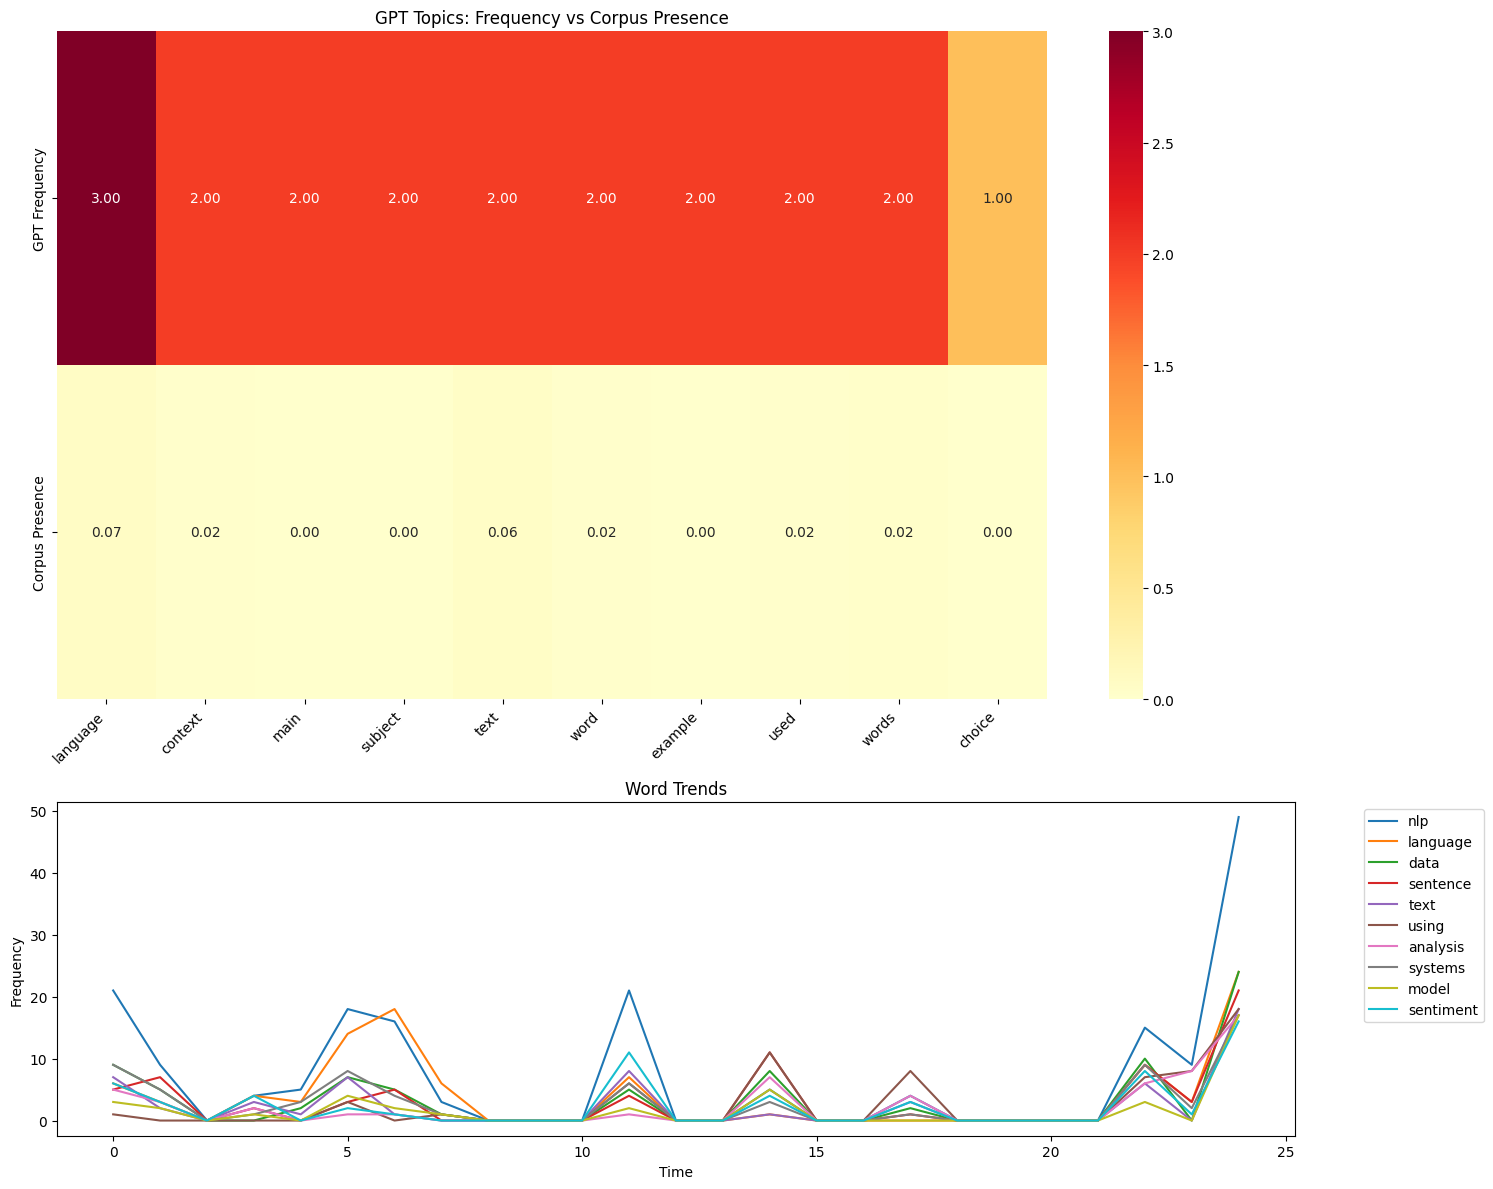

📊 Correlation between GPT Frequency and Corpus Presence: 0.69

📌 3. Comparison with Interdependent Words
🔀 Overlap between GPT topics and interdependent words: 1 words
💡 Overlapping words: text


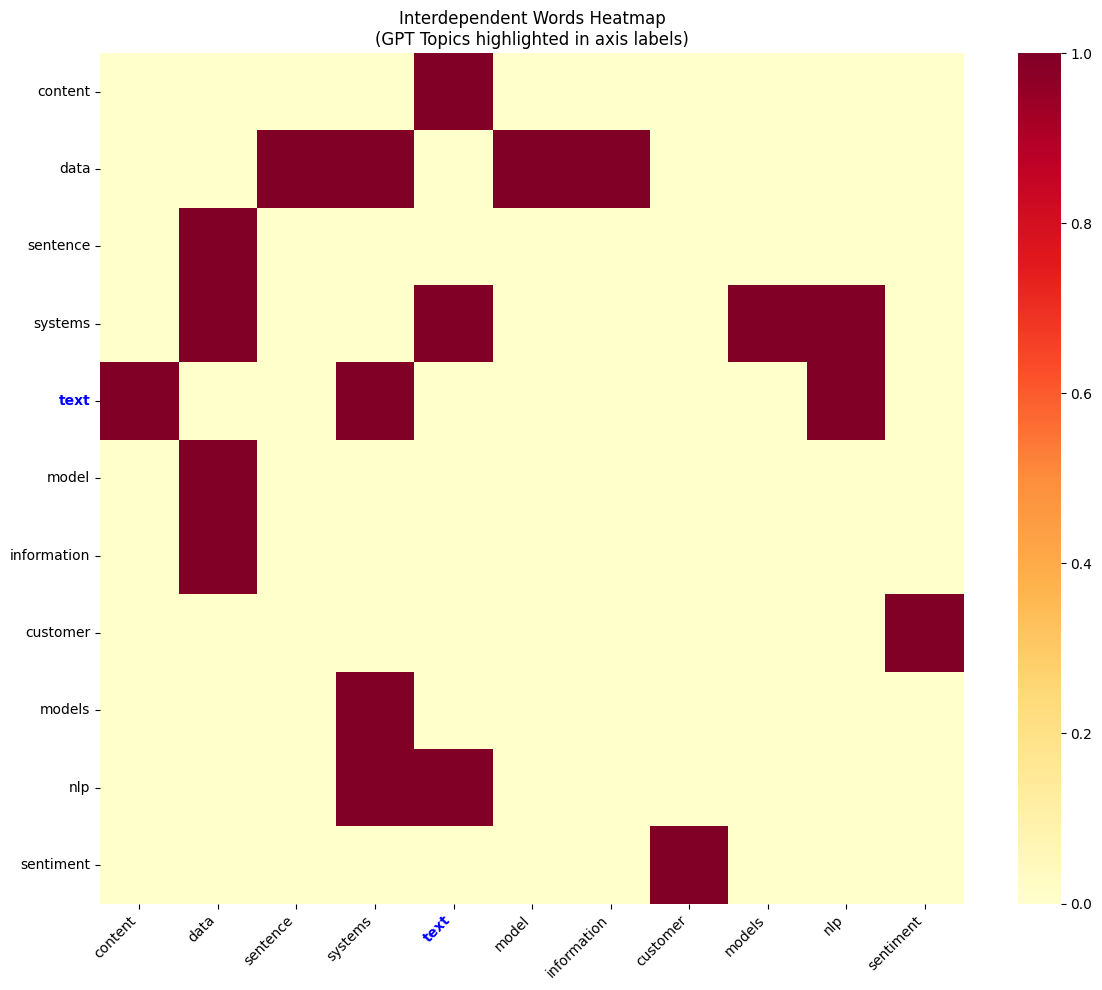

✅ GPT Topic Analysis and Comparison Completed


In [226]:
#@title GPT Analysis
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def gpt_topic_analysis_and_comparison(model, tokenizer, corpus, word_trends, interdependent_pairs, fp, num_samples=5):
    fp.header("GPT Topic Analysis and Comparison")

    # 1. Use GPT to find common topics
    fp.subheader("1. GPT-based Topic Analysis")
    topics = gpt_find_common_topics(model, tokenizer, corpus, fp, num_samples)

    fp.info("Most common topics identified by GPT:", 'light_bulb')
    for topic, count in topics.most_common(10):
        fp.info(f"  {topic}: {count}", 'pin')

    # 2. Compare with Word Trend Analysis
    fp.subheader("2. Comparison with Word Trend Analysis")
    compare_gpt_with_word_trends(topics, word_trends, corpus, fp)

    # 3. Compare with Interdependent Words
    fp.subheader("3. Comparison with Interdependent Words")
    compare_gpt_with_interdependence(topics, interdependent_pairs, fp)

    fp.success("GPT Topic Analysis and Comparison Completed")

def gpt_find_common_topics(model, tokenizer, corpus, fp, num_samples=5):
    topics = Counter()
    questions = [
        "What are the main topics discussed in this text?",
        "Can you identify the key themes in this passage?",
        "What subject areas are covered in this content?",
        "What are the primary concepts addressed here?",
        "Could you summarize the main ideas in this text?"
    ]

    for i in range(num_samples):
        sample_text = random.choice(corpus)
        question = questions[i % len(questions)]  # Cycle through questions
        prompt = f"{sample_text}\n\n{question}"

        fp.info(f"\nQuestion {i+1}: {question}", 'magnifier')

        response = generate_text(model, tokenizer, prompt)
        fp.info(f"Response: {response}", 'robot')

        # Extract topics from the response
        extracted_topics = extract_topics_from_response(response)
        topics.update(extracted_topics)

        fp.info(f"Extracted topics: {', '.join(extracted_topics)}", 'light_bulb')

    return topics

def compare_gpt_with_word_trends(gpt_topics, word_trends, corpus, fp):
    gpt_top_topics = dict(gpt_topics.most_common(10))
    trend_top_words = dict(sorted(word_trends.items(), key=lambda x: max(x[1]), reverse=True)[:10])

    overlap = set(gpt_top_topics.keys()) & set(trend_top_words.keys())

    fp.info(f"Overlap between GPT topics and trend words: {len(overlap)} words", '🔀')
    fp.info(f"Overlapping words: {', '.join(overlap)}", '💡')

    # Prepare data for heatmap
    vectorizer = CountVectorizer(vocabulary=gpt_top_topics.keys())
    topic_presence = vectorizer.fit_transform(corpus).toarray()
    topic_presence = topic_presence.sum(axis=0) / len(corpus)

    # Create a DataFrame for the heatmap
    df = pd.DataFrame({
        'Topic': list(gpt_top_topics.keys()),
        'GPT Frequency': list(gpt_top_topics.values()),
        'Corpus Presence': topic_presence
    })
    df = df.sort_values('GPT Frequency', ascending=False)

    # Visualize comparison
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [2, 1]})

    # Heatmap for GPT Topics and Corpus Presence
    sns.heatmap(df[['GPT Frequency', 'Corpus Presence']].T,
                annot=True, cmap='YlOrRd', ax=ax1,
                xticklabels=df['Topic'], fmt='.2f')
    ax1.set_title("GPT Topics: Frequency vs Corpus Presence")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

    # Trend Words
    for word, trend in trend_top_words.items():
        ax2.plot(range(len(trend)), trend, label=word)
    ax2.set_title("Word Trends")
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Frequency")
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    # Additional analysis: Correlation between GPT Frequency and Corpus Presence
    correlation = df['GPT Frequency'].corr(df['Corpus Presence'])
    fp.info(f"Correlation between GPT Frequency and Corpus Presence: {correlation:.2f}", '📊')

def compare_gpt_with_interdependence(gpt_topics, interdependent_pairs, fp):
    gpt_top_topics = set(word for word, _ in gpt_topics.most_common(20))
    interdependent_words = set(word for pair, _ in interdependent_pairs[:10] for word in pair)

    overlap = gpt_top_topics & interdependent_words

    fp.info(f"Overlap between GPT topics and interdependent words: {len(overlap)} words", '🔀')
    fp.info(f"Overlapping words: {', '.join(overlap)}", '💡')

    # Prepare data for heatmap
    words = list(interdependent_words)
    matrix = np.zeros((len(words), len(words)))
    for (word1, word2), _ in interdependent_pairs[:10]:
        i, j = words.index(word1), words.index(word2)
        matrix[i, j] = matrix[j, i] = 1

    # Visualize comparison
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, xticklabels=words, yticklabels=words, cmap='YlOrRd', cbar=True)
    plt.title("Interdependent Words Heatmap\n(GPT Topics highlighted in axis labels)")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Highlight GPT topics in axis labels
    for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
        if label.get_text() in gpt_top_topics:
            label.set_weight('bold')
            label.set_color('blue')

    plt.tight_layout()
    plt.show()

def generate_text(model, tokenizer, prompt, max_length=100):
    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    attention_mask = torch.ones(input_ids.shape, dtype=torch.long, device=input_ids.device)

    output = model.generate(
        input_ids,
        attention_mask=attention_mask,
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.7,
        pad_token_id=tokenizer.eos_token_id
    )
    return tokenizer.decode(output[0], skip_special_tokens=True)

# Usage
fp = FancyPrinter()
gpt_topic_analysis_and_comparison(model, tokenizer, corpus, word_trends, interdependent_pairs, fp)

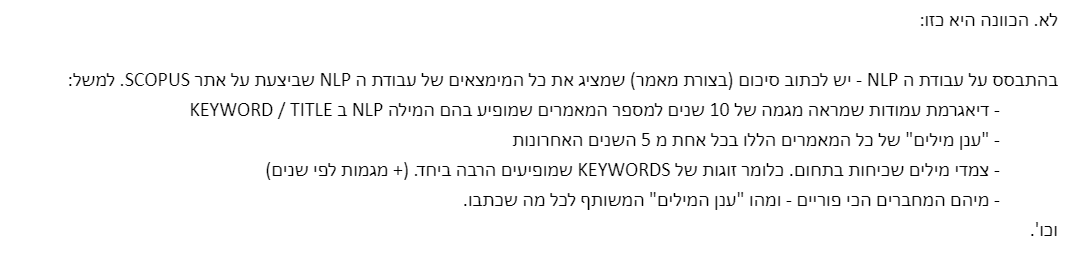